<font color="red"><u>**Mise à jour du 08.12.2021**</u></font><br>
Les fichiers sont désormais créés par le notebook `"projDS-00-fichiers"`.<br>
Ce notebook n'est là que pour l'analyse des fichiers d'origine (les cellules de création des fichiers ont été transformées en texte brut).

In [1]:
# librairies nécessaires

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import timedelta
begin_time = time.time()

# options
# pd.set_option('display.width', 150)
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 50)

In [2]:
# methodes utiles

# affichage sous forme de tableau côte à côte
from IPython.display import display_html
from itertools import chain,cycle

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

<a class="anchor" id="hautdepage"></a>

***
## Table des matières:
<b>1. [Fichier sentiment_values.csv](#sent_val_title)</b> > \[df_sentiment]
 * [Analyse des dictionnaires de sentiments](#sent_dico_analyse)
 * [Conclusion sur les dictionnaires de sentiments](#sent_dico_ccl)
 * [Analyse des hashtag](#sent_hashtag_analyse)
 * [Conclusion sur les hashtag](#sent_hashtag_ccl)
 * [Analyse hashtag & dictionnaires de sentiments](#sent_hashtag_dico)
 * <b>[Conclusion fichier sentiment_values.csv](#sent_ccl)</b>
 * <b>[Constitution du fichier df_sentiment.csv](#sent_df)</b>


<b>2. [Fichier user_track_hashtag_timestamp.csv](#user_track_hashtag_title)</b> > \[df_usertrack]
 * [Analyse des données utilisateur & morceaux de musique](#user_track_analyse)
 * [Conclusion sur les données utilisateur & morceaux de musique](#user_track_ccl)
 * [Analyse des données hashtag](#user_hashtag_analyse)
 * [Conclusion sur les données hashtag](#user_hashtag_ccl)
 * <b>[Conclusion fichier user_track_hashtag_timestamp.csv](#user_ccl)</b>
 * <b>[Constitution du fichier df_usertrack.csv](#user_df)</b>

<b>3. [Fichier context_content_features.csv](#context_content_title)</b> > \[df_context]
 * [Analyse des informations utilisateur](#context_user_analyse)
 * [Conclusion sur les informations utilisateur](#context_user_ccl)
 * [Analyse desvariables de langues](#context_lang_analyse)
 * [Conclusion sur les variables de langues](#context_lang_ccl)
 * [Analyse des données géographiques](#context_geo_analyse)
 * [Conclusion sur les données géographiques](#context_geo_ccl)
 * [Analyse des spécificités des morceaux](#context_track_analyse)
 * [Conclusion sur les spécificités des morceaux](#context_track_ccl)
 * <b>[Conclusion fichier context_content_features.csv](#context_ccl)</b>
 * <b>[Constitution du fichier df_context.csv](#context_df)</b>

<b>4. [Constitution du fichier df_global.csv](#global_df)</b> > \[df_global]


***
<a id="sent_val_title"></a> 
# Fichier sentiment_values.csv > [df_sentiment]

 * [Analyse des dictionnaires de sentiments](#sent_dico_analyse)
 * [Conclusion sur les dictionnaires de sentiments](#sent_dico_ccl)
 * [Analyse des hashtag](#sent_hashtag_analyse)
 * [Conclusion sur les hashtag](#sent_hashtag_ccl)
 * [Analyse hashtag & dictionnaires de sentiments](#sent_hashtag_dico)
 * <b>[Conclusion fichier sentiment_values.csv](#sent_ccl)</b>
 * <b>[Constitution du fichier df_sentiment.csv](#sent_df)</b>
 
[retour à la table des matières](#hautdepage)

<u>**Import & analyse du fichier**</u>

In [3]:
# chargement du fichier
sentiment_values = pd.read_csv('sentiment_values.csv', sep=',')
print("dimensions avant opérations sur les colonnes:", sentiment_values.shape)

# reinitialisation de l'index (hashtag + 3 colonnes de valeurs par défaut)
sentiment_values.reset_index(inplace=True)

# correction des colonnes 
# (le dernier dictionnaire est appelé X_.., mais ce pourrait être un dictionnaire comme SentiWordNet)
new_cols = ['hashtag', 'vader_min', 'vader_max', 'vader_sum', 'vader_avg',
       'afinn_min', 'afinn_max', 'afinn_sum', 'afinn_avg', 'ol_min', 'ol_max',
       'ol_sum', 'ol_avg', 'ss_min', 'ss_max', 'ss_sum', 'ss_avg','X_min', 'X_max', 'X_sum', 'X_avg']
sentiment_values.columns = new_cols

print("dimensions après opérations sur les colonnes:", sentiment_values.shape)

dimensions avant opérations sur les colonnes: (5290, 17)
dimensions après opérations sur les colonnes: (5290, 21)


In [4]:
# nettoyage des lignes vides
sentiment_values.dropna(axis = 0, how ='all', inplace=True);
print("fichier après suppression des lignes vides: ",sentiment_values.shape)

fichier après suppression des lignes vides:  (5290, 21)


In [5]:
# aperçu du fichier
sentiment_values.head()

,hashtag,vader_min,vader_max,vader_sum,vader_avg,afinn_min,afinn_max,afinn_sum,afinn_avg,ol_min,...,ol_sum,ol_avg,ss_min,ss_max,ss_sum,ss_avg,X_min,X_max,X_sum,X_avg
0,relaxtime,0.8,0.8,2.4,0.8,NaN,NaN,NaN,NaN,0.7375,...,0.7375,0.7375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,melovechilicheese,0.8,0.8,0.8,0.8,NaN,NaN,NaN,NaN,0.9000,...,0.9000,0.9000,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
2,greatmusic,0.8,0.8,2.4,0.8,1.0,1.0,1.0,1.0,0.8875,...,0.8875,0.8875,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
3,rockballad,0.7,0.7,0.7,0.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,amonamarth,0.3,0.3,0.3,0.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
sentiment_values.info()
# 1 donnée objet (hashtag), tout le reste est numérique (float)
# beaucoup de NaN (afinn, ...)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hashtag    5290 non-null   object 
 1   vader_min  3867 non-null   float64
 2   vader_max  3867 non-null   float64
 3   vader_sum  3867 non-null   float64
 4   vader_avg  3867 non-null   float64
 5   afinn_min  255 non-null    float64
 6   afinn_max  255 non-null    float64
 7   afinn_sum  255 non-null    float64
 8   afinn_avg  255 non-null    float64
 9   ol_min     2635 non-null   float64
 10  ol_max     2635 non-null   float64
 11  ol_sum     2635 non-null   float64
 12  ol_avg     2635 non-null   float64
 13  ss_min     2823 non-null   float64
 14  ss_max     2823 non-null   float64
 15  ss_sum     2823 non-null   float64
 16  ss_avg     2823 non-null   float64
 17  X_min      2160 non-null   float64
 18  X_max      2160 non-null   float64
 19  X_sum      2160 non-null   float64
 20  X_avg   

In [7]:
# nombre de valeurs nulles et le % que ça représente dans chaque variable
display(pd.DataFrame({'nb null': sentiment_values.isnull().sum(), '% null': round(100*sentiment_values.isnull().sum()/len(sentiment_values),2)}).sort_values(by='% null', ascending=False))

# beaucoup trop de valeurs nulles dans afinn pour pouvoir réellement exploiter cette variable.
# les autres - excepté vader - tournent aux alentour de 50% de NaN, c'est pas terrible
# nous verrons s'il y a nécessité/possiblité de combiner ces dictionnaires par la suite

,nb null,% null
afinn_min,5035,95.18
afinn_max,5035,95.18
afinn_sum,5035,95.18
afinn_avg,5035,95.18
X_avg,3130,59.17
X_sum,3130,59.17
X_max,3130,59.17
X_min,3130,59.17
ol_sum,2655,50.19
ol_avg,2655,50.19


\> Retour à [**Analyse du fichier sentiment_values.csv**](#sent_val_title)  |  [**Table des matières**](#hautdepage)

<a class="anchor" id="sent_dico_analyse"></a>
### <u>Analyse des dictionnaires de sentiments :</u>

In [8]:
display_side_by_side(sentiment_values[['vader_min', 'vader_max', 'vader_avg',
                                       'afinn_min', 'afinn_max', 'afinn_avg',
                                       'ol_min', 'ol_max', 'ol_avg',
                                       'ss_min', 'ss_max', 'ss_avg',
                                       'X_min', 'X_max', 'X_avg']
                                     ].describe().transpose().iloc[:,1:],
                     sentiment_values[['vader_sum', 'afinn_sum', 'ol_sum', 'ss_sum', 'X_sum']
                                     ].describe().transpose().iloc[:,1:],                     
                     titles=['min, max, avg', 'sum'])

# les dictionnaires de sentiment comportent tous des valeurs entre 0 et 1, la moyenne est autour de 0.5 (excepté les ..._sum)
# on peut considérer que ces dictionnaires sont "standardisés"

,mean,std,min,25%,50%,75%,max
vader_min,0.495035,0.239754,0.1000,0.3000,0.4000,0.7000,1.0
vader_max,0.513007,0.239695,0.1000,0.3000,0.6000,0.7000,1.0
vader_avg,0.503563,0.236347,0.1000,0.3000,0.6000,0.7000,1.0
afinn_min,0.745098,0.436663,0.0000,0.0000,1.0000,1.0000,1.0
afinn_max,0.752941,0.432149,0.0000,1.0000,1.0000,1.0000,1.0
afinn_avg,0.749020,0.432158,0.0000,0.5000,1.0000,1.0000,1.0
ol_min,0.523107,0.262607,0.0375,0.2875,0.6125,0.7375,0.9
ol_max,0.544905,0.260557,0.0375,0.3125,0.6500,0.7375,0.9
ol_avg,0.534016,0.256876,0.0375,0.3000,0.6125,0.7375,0.9
ss_min,0.451647,0.497745,0.0000,0.0000,0.0000,1.0000,1.0


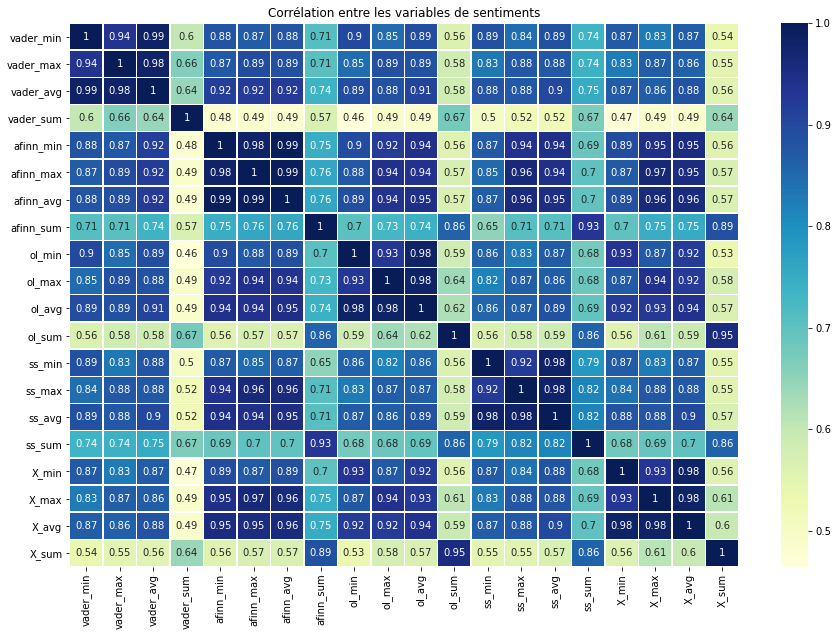

In [9]:
# correlation entre les variables de sentiments

corr=sentiment_values[['vader_min', 'vader_max', 'vader_avg', 'vader_sum',
                       'afinn_min', 'afinn_max', 'afinn_avg', 'afinn_sum', 
                       'ol_min', 'ol_max', 'ol_avg', 'ol_sum',
                       'ss_min', 'ss_max', 'ss_avg', 'ss_sum', 
                       'X_min', 'X_max', 'X_avg', 'X_sum']].corr();

fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(corr, annot=True, ax=ax, linewidths=.5, cmap='YlGnBu');
# diverging colomap PiYG, PuOr, RdGy, YlGnBu
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# YlGnBu, Blues fmt='.1f',
plt.title('Corrélation entre les variables de sentiments');

***
<u>__[vader...]__ :</u>
<br>VADER = Valence Aware Dictionary and sEntiment Reasoner - <a href="https://pypi.org/project/vaderSentiment/">https://pypi.org/project/vaderSentiment/</a><br>

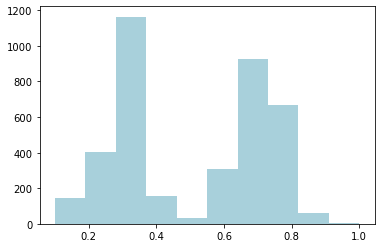

In [10]:
plt.hist(sentiment_values['vader_avg'], bins=10, color='#A8D0DB');

<u>__[afinn...] :__</u>
<br>Afinn
<a href="https://github.com/fnielsen/afinn/tree/master/afinn/data">https://github.com/fnielsen/afinn/tree/master/afinn/data</a><br>
dictionnaire de sentiments développé pour analyser les tweets,  centré sur 0 (neutre)<br>
les sentiments sont normalement classés entre -5 (le plus négatif) et +5 (le plus positif)<br>
<br/>Ici les sentiments sont notés entre 0 et 1.. et il y a très peu de données

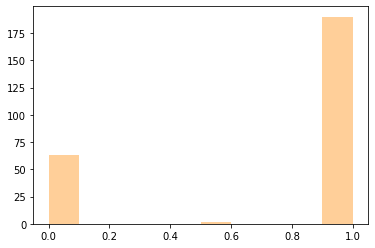

In [11]:
plt.hist(sentiment_values['afinn_avg'], bins=10, color='#ffcf99');

***
__[ol_...]__ :
<br>Hu & Liu Opinion Lexicon
<a href="https://www.cs.uic.edu/~liub/">https://www.cs.uic.edu/~liub/</a><br>

dictionnaire de sentiments de 6800 mots, 2006 positifs et 4783 négatifs<br>
Ici les valeurs sont comprises entre 0 et 1_

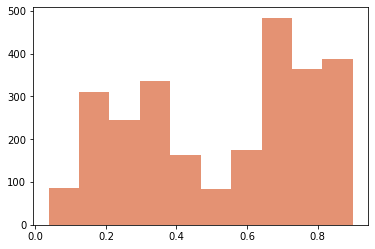

In [12]:
plt.hist(sentiment_values['ol_avg'], bins=10, color='#E49273');

***
__[ss_...]__ :
<br>Sentistrength Lexicon
http://sentistrength.wlv.ac.uk/<br>
(2 scores : sentiments positifs de 1 (pas positif) à 5 (extrèment positif), sentiments négatifs de -1 (pas négatif) à -5 (extrèmement négatif))
<br/>ou
Stanford SocialSent ?
https://nlp.stanford.edu/projects/socialsent/
<br/>Ici les valeurs sont entre 0 et 1.. et il y a très peu de données => __inexploitable___


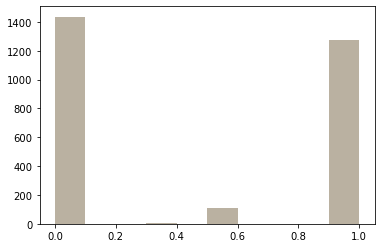

In [13]:
plt.hist(sentiment_values['ss_avg'], bins=10, color='#BAB1A1');

***
__[X_...] :__
<br>SentiWordNet (SWN) ?
<br>
Ce dictionnaire comporte normalement 2 valeurs pour les scores positifs & négatifs
<br>Ici les valeurs sont entre 0 et 1

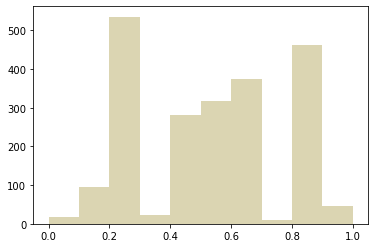

In [14]:
plt.hist(sentiment_values['X_avg'], bins=10, color='#DBD5B2');

<a class="anchor" id="sent_dico_ccl"></a>
<u><b>Conclusion :</b></u><br>
<blockquote>
Nous ne retiendrons que des dictionnaires que leurs notes "moyennes" (..._avg)
<br>
vader_avg est la variable celui qui contient le plus d'informations, il faudra étudier s'il y a nécessité de la compléter avec d'autres variables (ss_avg, ol_avg, X_avg & afinn_avg)
</blockquote>

\> Retour à [**Analyse du fichier sentiment_values.csv**](#sent_val_title)  |  [**Table des matières**](#hautdepage)

<a class="anchor" id="sent_hashtag_analyse"></a>
### <u>Analyse des hashtag :</u>

In [15]:
print(len(sentiment_values['hashtag'].unique()),"hashtag différents")
print(sentiment_values['hashtag'].isna().sum(),'hashtags vides')
# 5290 hashtag différents
# 0 hashtags vides


5290 hashtag différents
0 hashtags vides


In [16]:
print('hashtags:\n',list(sentiment_values['hashtag'].sort_values()))
# il y a des hashtags très similaires > 'classic', 'classical', 'classicalbum', 'classicalbums', ...'classicks',
# mais on ne va pas jouer à les regrouper par synonymes ^^

hashtags:
 ['abachatear', 'abeautifulsong', 'abominableputridity', 'aborted', 'abouttogooutjams', 'absurd', 'acabandolatarde', 'accept', 'aceofangels', 'aceofspades', 'adblockplus', 'addicted', 'addicted2thehustlesept31st', 'addicted2u', 'addictedtolove', 'addictedtothis', 'addictedtothissong', 'addictedtoyou', 'addicting', 'addiction', 'addictions', 'addictive', 'addinggoodstuff', 'adelerocks', 'adoptaunlunes', 'adore', 'adorethissong', 'adoreu', 'adoreyou', 'adormir', 'adorn', 'adornetrecomienda', 'adoro', 'adventure', 'adventureclub', 'adventuretime', 'aesoprock', 'aesoprockwins', 'afanforever', 'afraid', 'afterdark', 'afterhourplaylist', 'afternoonchill', 'afternoondelight', 'afternoonjam', 'afterwork', 'againbecauseitissogood', 'againnagain', 'against', 'againstyourwill', 'aggression', 'agileworkflow', 'agirllikeme', 'ahorasuena', 'ailoveit', 'aimlessarrow', 'aintitfun', 'aintitlovely', 'airplay', 'airplaybyrequest', 'alangraysonsongs', 'alarma', 'alexisonfire', 'alfredhitchcock',

<a class="anchor" id="sent_hashtag_ccl"></a>
<u><b>Conclusion :</b></u><br>
<blockquote>
Rien de particulier à dire sur le dictionnaire des hashtags à part qu'il y en a de très similaires.
</blockquote>

\> Retour à [**Analyse du fichier sentiment_values.csv**](#sent_val_title)  |  [**Table des matières**](#hautdepage)

<a id="sent_hashtag_dico"></a>
<b><u>Analyse hashtag & dictionnaires de sentiments:</u></b>

Compte tenu des valeurs nulles dans les dictionnaires de sentiment, tous les hashtags sont-ils notés par un ou plusieurs dictionnaires ? 
<br>
Comment traiter les hashtag qui n'ont aucune note ?

In [17]:
# fonction de recherche des valeurs nulles dans 
def null_val(df,var_arr):
    """
    renvoie le nb d'entrées vides 
    pour le dataframe df
    dont on sélectionne les variables dans le tableau var_arr
    (c'est une sorte de isna avec subset)
    """
    null_dict = []
    for i in var_arr:
        null_dict.append(""+df+"['"+i+"'].isna()")

    print(var_arr, ":", eval(df+"["+(" & ".join(null_dict))+"].shape[0]"),"valeurs vides")

# --------------------------------------------------------------------------------------

sentiment_dictionnaries = ['vader_avg', 'ss_avg', 'ol_avg', 'X_avg', 'afinn_avg']

# Rappel des valeurs NaN des dictionnaires
for sent_d in sentiment_dictionnaries:
    print(sent_d, ':',sentiment_values[sent_d].isna().sum(),'valeurs nulles (',
          round(100*sentiment_values[sent_d].isna().sum()/len(sentiment_values[sent_d]),2),"% )")

# quels dictionnaires faut-il conserver pour s'assurer qu'on ait un score "sentiment" pour chaque hashtag ?
# (les dictionnaires de sentiment sont classés par nombre décroissant de valeurs vides)
print("\n valeurs vides & cumul des dictionnaires :")
null_val("sentiment_values", sentiment_dictionnaries[0:1])
null_val("sentiment_values", sentiment_dictionnaries[0:2])
null_val("sentiment_values", sentiment_dictionnaries[0:3])
null_val("sentiment_values", sentiment_dictionnaries[0:4])
null_val("sentiment_values", sentiment_dictionnaries)


vader_avg : 1423 valeurs nulles ( 26.9 % )
ss_avg : 2467 valeurs nulles ( 46.64 % )
ol_avg : 2655 valeurs nulles ( 50.19 % )
X_avg : 3130 valeurs nulles ( 59.17 % )
afinn_avg : 5035 valeurs nulles ( 95.18 % )

 valeurs vides & cumul des dictionnaires :
['vader_avg'] : 1423 valeurs vides
['vader_avg', 'ss_avg'] : 459 valeurs vides
['vader_avg', 'ss_avg', 'ol_avg'] : 37 valeurs vides
['vader_avg', 'ss_avg', 'ol_avg', 'X_avg'] : 0 valeurs vides
['vader_avg', 'ss_avg', 'ol_avg', 'X_avg', 'afinn_avg'] : 0 valeurs vides


Il faut cumuler les dictionnaires 'vader_avg', 'ss_avg', 'ol_avg', 'X_avg' pour que tous les hashtags aient une valeur de "sentiment".<br>
['vader_avg', 'ss_avg', 'ol_avg', 'X_avg'] : 0 valeurs vides

Afinn n'a aucune valeur ajoutée car en cumulant 'vader_avg', 'ss_avg', 'ol_avg', 'afinn_avg' il reste encore 37 valeurs vides (changer l'ordre du sentiment_dictionnaries ci-dessus si l'on souhaite vérifier) :<br>
['vader_avg', 'ss_avg', 'ol_avg', 'afinn_avg'] : 37 valeurs vides

<br><b><u>Idée:</u></b><br>
Création d'une variable "sentiment score" basée sur ces 4 variables 'vader_avg', 'ss_avg', 'ol_avg', 'X_avg'.<br>
par différentes méthodes
1. sent_score1 : complétion des valeurs nulles par les valeurs des autres variables
2. sent_score2 : moyenne de toutes les variables
3. sent_score3 : vader_avg ou la moyenne des autres variables

Les variables les plus intéressantes (en terme de nombre ou de distribution) sont (sans l'ordre décroissant) :
- vader_avg car elle contient le moins de NaN
- puis ol_avg, X_avg compte tenu de leur distribution
- puis ss_avg 



In [18]:
# 1ere option : compléter les valeurs nulles dans l'ordre décroissant des variables nulles 'vader_avg', 'ss_avg', 'ol_avg', 'X_avg'
sentiment_values['sent_score1'] = ((sentiment_values['vader_avg'].fillna(sentiment_values['ol_avg'])).fillna(sentiment_values['X_avg'])).fillna(sentiment_values['ss_avg'])

# 2ème option : faire une moyenne de toutes les valeurs
sentiment_values['sent_score2'] = sentiment_values[['vader_avg','ol_avg','X_avg','ss_avg']].mean(numeric_only=True, axis=1)

# 3ème option : vader_avg ou la moyenne des autres variables
sentiment_values['sent_score3'] = sentiment_values['vader_avg'].fillna(sentiment_values[['ol_avg','X_avg','ss_avg']].mean(numeric_only=True, axis=1))

# print("sent_score1 a",sentiment_values['sent_score1'].isna().sum(),"valeurs vides")
# print("sent_score2 a",sentiment_values['sent_score2'].isna().sum(),"valeurs vides")
# print("sent_score3 a",sentiment_values['sent_score3'].isna().sum(),"valeurs vides")

In [19]:
# comparaison des dictionnaires créés
sentiment_values[['vader_avg','ol_avg','X_avg','ss_avg','sent_score1','sent_score2','sent_score3']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vader_avg,3867.0,0.503563,0.236347,0.1000,0.300000,0.60000,0.700000,1.0
ol_avg,2635.0,0.534016,0.256876,0.0375,0.300000,0.61250,0.737500,0.9
X_avg,2160.0,0.527677,0.234509,0.0000,0.300000,0.60000,0.700000,1.0
ss_avg,2823.0,0.471248,0.489264,0.0000,0.000000,0.00000,1.000000,1.0
sent_score1,5290.0,0.503835,0.282177,0.0000,0.300000,0.60000,0.700000,1.0
sent_score2,5290.0,0.502507,0.309474,0.0000,0.204167,0.59375,0.796875,1.0
sent_score3,5290.0,0.504889,0.284459,0.0000,0.300000,0.60000,0.700000,1.0


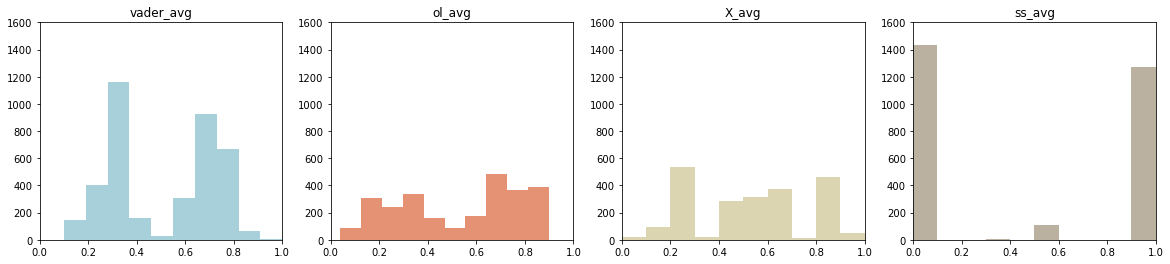

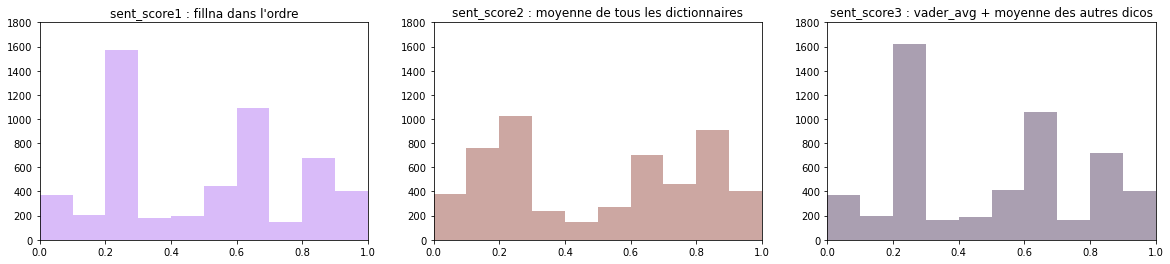

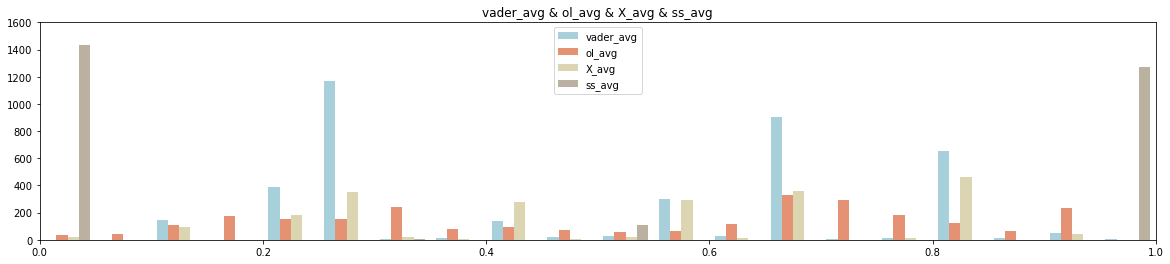

In [20]:
plt.figure(figsize=(20, 4))

plt.subplot(141)
plt.hist(sentiment_values['vader_avg'], bins=10, color='#A8D0DB')
plt.xlim([0, 1])
plt.ylim([0, 1600])
plt.title('vader_avg')

plt.subplot(142)
plt.hist(sentiment_values['ol_avg'], bins=10, color='#E49273')
plt.xlim([0, 1])
plt.ylim([0, 1600])
plt.title('ol_avg')

plt.subplot(143)
plt.hist(sentiment_values['X_avg'], bins=10, color='#DBD5B2')
plt.xlim([0, 1])
plt.ylim([0, 1600])
plt.title('X_avg')

plt.subplot(144)
plt.hist(sentiment_values['ss_avg'], bins=10, color='#BAB1A1')
plt.xlim([0, 1])
plt.ylim([0, 1600])
plt.title('ss_avg')
plt.show()

# dictionnaires créés
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.hist(sentiment_values['sent_score1'], bins=10, color='#D9BBF9')
plt.xlim([0, 1])
plt.ylim([0, 1800])
plt.title('sent_score1 : fillna dans l\'ordre')

plt.subplot(132)
plt.hist(sentiment_values['sent_score2'], bins=10, color='#CCA7A2')
plt.xlim([0, 1])
plt.ylim([0, 1800])
plt.title('sent_score2 : moyenne de tous les dictionnaires')

plt.subplot(133)
plt.hist(sentiment_values['sent_score3'], bins=10, color='#AA9FB1')
plt.xlim([0, 1])
plt.ylim([0, 1800])
plt.title('sent_score3 : vader_avg + moyenne des autres dicos')
plt.show();

# l'ensemble des dictionnaires de sentiments
plt.figure(figsize=(20, 4))

plt.hist([sentiment_values['vader_avg'], sentiment_values['ol_avg'], sentiment_values['X_avg'], sentiment_values['ss_avg']], bins=20, color = ['#A8D0DB', '#E49273', '#DBD5B2', '#BAB1A1'], label = ['vader_avg', 'ol_avg', 'X_avg', 'ss_avg'])

# plt.hist(
#    [sentiment_values['vader_avg'], sentiment_values['ol_avg'], sentiment_values['X_avg'], sentiment_values['ss_avg'], 
#     sentiment_values['sent_score1'], sentiment_values['sent_score2'], sentiment_values['sent_score3']
#    ], bins=20, 
#    color = ['#A8D0DB', '#E49273', '#DBD5B2', '#BAB1A1', '#D9BBF9', '#CCA7A2', '#AA9FB1'], 
#    label = ['vader_avg', 'ol_avg', 'X_avg', 'ss_avg', 'sent_score1', 'sent_score2', 'sent_score3'])

plt.xlim([0, 1])
plt.ylim([0, 1600])
plt.title('vader_avg & ol_avg & X_avg & ss_avg')
plt.legend();



\> Retour à [**Analyse du fichier sentiment_values.csv**](#sent_val_title)  |  [**Table des matières**](#hautdepage)

<u>Hashtags & scores de sentiments :</u>

In [21]:
# illustration de quelques scores de sentiments
# pour des hashtags positifs ou négatifs
sent = sentiment_values.copy()
sent.set_index('hashtag', inplace=True)
display(sent.loc[['amazing','beautiful','love','hapiness','bad','jealous','jealousy','hopeless', 'horror','hostiles','danger']][['vader_avg','ol_avg','X_avg','ss_avg','sent_score1','sent_score2','sent_score3']])

print("\n now playing :")
display(sent.loc[['nowpalying', 'nowplay', 'nowplayin', 'nowplaying', 'np']][['vader_avg','ol_avg','X_avg','ss_avg','sent_score1','sent_score2','sent_score3']])

del(sent)

,vader_avg,ol_avg,X_avg,ss_avg,sent_score1,sent_score2,sent_score3
hashtag,,,,,,,
amazing,0.8,NaN,NaN,NaN,0.8,0.800000,0.8
beautiful,0.8,NaN,NaN,NaN,0.8,0.800000,0.8
love,0.8,0.9000,0.8,1.0,0.8,0.875000,0.8
hapiness,0.7,0.6750,0.7,NaN,0.7,0.691667,0.7
bad,0.3,0.1875,0.2,0.0,0.3,0.171875,0.3
jealous,0.2,0.2500,0.3,0.0,0.2,0.187500,0.2
jealousy,0.2,NaN,NaN,NaN,0.2,0.200000,0.2
hopeless,0.1,0.2500,0.3,0.0,0.1,0.162500,0.1
horror,0.1,0.1625,NaN,NaN,0.1,0.131250,0.1



 now playing :


,vader_avg,ol_avg,X_avg,ss_avg,sent_score1,sent_score2,sent_score3
hashtag,,,,,,,
nowpalying,NaN,NaN,NaN,0.0,0.000,0.0000,0.000
nowplay,0.6,0.675,NaN,NaN,0.600,0.6375,0.600
nowplayin,0.6,0.675,NaN,NaN,0.600,0.6375,0.600
nowplaying,0.6,0.675,NaN,NaN,0.600,0.6375,0.600
np,NaN,0.675,NaN,NaN,0.675,0.6750,0.675


<a class="anchor" id="sent_ccl"></a>
### <u><b>Conclusion fichier sentiment_values.csv :</b></u><br>
<blockquote>
Faire un choix de la variable "score de sentiment" à conserver : 
    <ul>
        <li>sent_score3 car plus équilibré "visuellement" ?</li>
        <li>sent_score1 ou sent_score2 car plus proches de vader_avg (variable ayant moins de NaN) ?</li>
    </ul>
<br> pour l'instant c'est sent_score2 qui a été conservé car il semble plus équilibré
<br> voir pour la suite s'il faut conserver ce "score de sentiment " en l'état ou s'il faut créer des paliers(par ex -2, -1, 0, 1, 2)
</blockquote>

\> Retour à [**Analyse du fichier sentiment_values.csv**](#sent_val_title)  |  [**Table des matières**](#hautdepage)

<a id="sent_df"></a>
### <u><b><font color="#A40606">Constitution du fichier df_sentiment.csv :</font></b></u><br>

<font color="red"><u>**Mise à jour du 08.12.2021**</u></font><br>
Les fichiers sont désormais créés par le notebook `"projDS-00-fichiers"`.<br>
Ce notebook n'est là que pour l'analyse des fichiers d'origine (les cellules de création des fichiers ont été transformées en texte brut).

In [22]:
# quel dictionnaire conserver ?
# là j'ai conservé le 2 (moyenne des dictionnaires 'vader_avg','ol_avg','X_avg','ss_avg') mais c'est à discuter
df_sentiment = sentiment_values[['hashtag', 'sent_score2']]


In [23]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hashtag      5290 non-null   object 
 1   sent_score2  5290 non-null   float64
dtypes: float64(1), object(1)
memory usage: 124.0+ KB


***
<a class="anchor" id="user_track_hashtag_title"></a>
# Fichier user_track_hashtag_timestamp.csv > [df_usertrack]

 * [Analyse des données utilisateur & morceaux de musique](#user_track_analyse)
 * [Conclusion sur les données utilisateur & morceaux de musique](#user_track_ccl)
 * [Analyse des données hashtag](#user_hashtag_analyse)
 * [Conclusion sur les données hashtag](#user_hashtag_ccl)
 * <b>[Conclusion fichier user_track_hashtag_timestamp.csv](#user_ccl)
 * <b>[Constitution du fichier df_usertrack.csv](#user_df)</b>
    
[retour à la table des matières](#hautdepage)

<u>**Import & analyse du fichier**</u>

In [24]:
# chargement du fichier
user_track_hashtag_timestamp = pd.read_csv('user_track_hashtag_timestamp.csv')
user_track_hashtag_timestamp.shape
# 17 560 113 entrées

(17560113, 4)

In [25]:
# nettoyage des lignes vides
user_track_hashtag_timestamp.dropna(axis = 0, how ='all', inplace=True)
print("fichier après suppression des lignes vides: ",user_track_hashtag_timestamp.shape)
# fichier après suppression des lignes vides:  (17560113, 4)
# aucune ligne vide

fichier après suppression des lignes vides:  (17560113, 4)


In [26]:
user_track_hashtag_timestamp

,user_id,track_id,hashtag,created_at
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,nowplaying,2014-01-01 05:54:21
1,81496937,cd52b3e5b51da29e5893dba82a418a4b,goth,2014-01-01 05:54:21
2,81496937,cd52b3e5b51da29e5893dba82a418a4b,deathrock,2014-01-01 05:54:21
3,81496937,cd52b3e5b51da29e5893dba82a418a4b,postpunk,2014-01-01 05:54:21
4,2205686924,da3110a77b724072b08f231c9d6f7534,NowPlaying,2014-01-01 05:54:22
...,...,...,...,...
17560108,2819332208,03498f305040835c5f76d7c5660204a2,nowplaying,2014-12-23 07:21:04
17560109,154070865,8bacefe018a221d933529dd466e7c1c0,nowplaying,2014-12-23 07:21:07
17560110,985591650,0e64c11b9a77e93f343f9c1c0cdbcf54,nowplaying,2014-12-23 07:21:08
17560111,15518784,af5c5f220e0a872ac129f4f88b3db5f9,nowplaying,2014-12-23 07:21:11


<blockquote>
Le fichier user_track_hashtag_timestamp contient les hashtags qu'un utilisateur (user_id) a associé à un morceau de musique (track_id)<br>
Le dataset comprend une entrée par hashtag, ce qui signifie qu'il y a plusieurs entrées pour un même utilisateur (user_id) et un même morceau de musique (track_id)
<br>

En comptabilisant les morceaux (track_id) renseignés par plusieurs utilisateurs (user_id) on en déduit la popularité d'un morceau (sans savoir si elle bonne ou mauvaise).

En l'associant au fichier sentiment, on peut considérer qu'un morceau (track_id) est apprécié (et donc à recommander) s'il est bien noté par différents utilisateurs. Plus un morceau est renseigné positivement par différents utilisateurs, plus il est apprécié.

<br>
Faut-il "moyenner" un morceau en fonction des notes de sentiment qu'il aura via ses hashtags ?<br>
En effet, un morceau = plusieurs hashtags = plusieurs notes de sentiment.
</blockquote>


In [27]:
user_track_hashtag_timestamp.info(show_counts=True)
#  seule ligne ne contient pas de hashtag

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17560113 entries, 0 to 17560112
Data columns (total 4 columns):
 #   Column      Non-Null Count     Dtype 
---  ------      --------------     ----- 
 0   user_id     17560113 non-null  int64 
 1   track_id    17560113 non-null  object
 2   hashtag     17560112 non-null  object
 3   created_at  17560113 non-null  object
dtypes: int64(1), object(3)
memory usage: 669.9+ MB


[retour en haut de page](#hautdepage)

\> Retour à [**Analyse du fichier user_track_hashtag_timestamp.csv**](#user_track_hashtag_title)  |  [**Table des matières**](#hautdepage)

<u>**Traitement de la donnée 'hashtag' isolée :**</u>

In [28]:
# une entrée ne comporte pas de hashtag
# entrée ne comportant pas de hashtag
print("entrée dont le hashtag est NaN :")
no_hashtag = user_track_hashtag_timestamp[user_track_hashtag_timestamp['hashtag'].isna()]
display(no_hashtag)

print("\nentrées pour le même morceau (track_id) par le même utilisateur (user_id) :")
# mais cette entrée concerne un morceau qui a d'autres hashtag par le même utilisateur
display(user_track_hashtag_timestamp[(user_track_hashtag_timestamp['user_id'] == no_hashtag['user_id'].values[0]) 
                                     & (user_track_hashtag_timestamp['track_id'] == no_hashtag['track_id'].values[0])
                                    ])

# => on peut supprimer l'entrée avec le hashtag = NaN

entrée dont le hashtag est NaN :


,user_id,track_id,hashtag,created_at
6089407,338894967,eea82c872aa5bc353480e7d0575bcde2,NaN,2014-06-10 07:49:16



entrées pour le même morceau (track_id) par le même utilisateur (user_id) :


,user_id,track_id,hashtag,created_at
6089407,338894967,eea82c872aa5bc353480e7d0575bcde2,NaN,2014-06-10 07:49:16
6089408,338894967,eea82c872aa5bc353480e7d0575bcde2,NP,2014-06-10 07:49:16
6089409,338894967,eea82c872aa5bc353480e7d0575bcde2,NowPlaying,2014-06-10 07:49:16


In [29]:
# suppression de l'entrée avec le hashtag = Nan
user_track_hashtag_timestamp.dropna(subset=['hashtag'], inplace=True)
user_track_hashtag_timestamp.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17560112 entries, 0 to 17560112
Data columns (total 4 columns):
 #   Column      Non-Null Count     Dtype 
---  ------      --------------     ----- 
 0   user_id     17560112 non-null  int64 
 1   track_id    17560112 non-null  object
 2   hashtag     17560112 non-null  object
 3   created_at  17560112 non-null  object
dtypes: int64(1), object(3)
memory usage: 669.9+ MB


\> Retour à [**Analyse du fichier user_track_hashtag_timestamp.csv**](#user_track_hashtag_title)  |  [**Table des matières**](#hautdepage)

<a class="anchor" id="user_track_analyse"></a>
<b><u>Analyse des données utilisateur & morceaux de musique :</u></b>

In [30]:
print("nombre de morceaux distincts :", len(user_track_hashtag_timestamp['track_id'].unique())) # 344 536
print("nombre d'utilisateurs distincts :", len(user_track_hashtag_timestamp['user_id'].unique())) # 138 223
print("nombre d'entrée à la même date / heure (mm morceau & mm utilisateur) :", len(user_track_hashtag_timestamp['created_at'].unique())) # 8 743 896

nombre de morceaux distincts : 344536
nombre d'utilisateurs distincts : 138223
nombre d'entrée à la même date / heure (mm morceau & mm utilisateur) : 8743896


Nous constatons que sur les 17 560 112 entrées<br>
il y en a 8 743 896 qui concernent des entrées "distinctes" par jour (utilisateur, morceau)<br><br>
Cela ne montre toutefois pas si un même morceau est renseigné plusieurs fois à des jours différents par un même utilisateur.

In [31]:
# entrées pour un même morceau générées par le même utilisateur
same_track_same_user = pd.DataFrame(user_track_hashtag_timestamp[['track_id','user_id']].groupby(['track_id','user_id']).size().reset_index(name='count'))
display(same_track_same_user)

print("\nUn même morceau peut être renseigné par un même utilisateur : ")
print("au minimum:\t",same_track_same_user['count'].min(),"fois")
print("au maximum:\t",same_track_same_user['count'].max(),"fois")
print("en moyenne:\t",same_track_same_user['count'].mean(),"fois")

# interprétation :
# le morceau 00003213fb3d4959f42e9157b0eda0a5
# comporte 12 entrées
# générées par l'utilisateur 23247402

,track_id,user_id,count
0,00003213fb3d4959f42e9157b0eda0a5,23247402,12
1,00004ddfbff448bb4a257d41d2e7c50b,107249710,1
2,00005d30ef79b5f2ce2bf73461191d10,40604485,1
3,00005d30ef79b5f2ce2bf73461191d10,123681079,1
4,00006c40ec8cea00dc7f5039afd59c28,2200546092,3
...,...,...,...
3017059,fffef37bec01701ce5f548fbdb26ad8b,76927491,4
3017060,fffef37bec01701ce5f548fbdb26ad8b,2294205733,2
3017061,ffff7a079e612c20cb79289269ff7cd6,83934711,1
3017062,ffff810de31a515d3f221dde21eb2b8b,61598331,1



Un même morceau peut être renseigné par un même utilisateur : 
au minimum:	 1 fois
au maximum:	 50383 fois
en moyenne:	 5.8202649993503615 fois


In [32]:
# illustration : morceau 00003213fb3d4959f42e9157b0eda0a5 & utilisateur 23247402
# 6 dates différentes => 12 entrées car 2 hashtag à chaque fois (newchristianmusic & nowplaying)
display(user_track_hashtag_timestamp[(user_track_hashtag_timestamp['track_id'] == '00003213fb3d4959f42e9157b0eda0a5') 
                                     & (user_track_hashtag_timestamp['user_id'] == 23247402)
                                    ])

,user_id,track_id,hashtag,created_at
16716971,23247402,00003213fb3d4959f42e9157b0eda0a5,newchristianmusic,2014-12-09 16:12:43
16716972,23247402,00003213fb3d4959f42e9157b0eda0a5,nowplaying,2014-12-09 16:12:43
17048574,23247402,00003213fb3d4959f42e9157b0eda0a5,newchristianmusic,2014-12-15 02:35:06
17048575,23247402,00003213fb3d4959f42e9157b0eda0a5,nowplaying,2014-12-15 02:35:06
17220578,23247402,00003213fb3d4959f42e9157b0eda0a5,newchristianmusic,2014-12-17 19:43:32
17220579,23247402,00003213fb3d4959f42e9157b0eda0a5,nowplaying,2014-12-17 19:43:32
17346235,23247402,00003213fb3d4959f42e9157b0eda0a5,newchristianmusic,2014-12-19 19:08:43
17346236,23247402,00003213fb3d4959f42e9157b0eda0a5,nowplaying,2014-12-19 19:08:43
17369219,23247402,00003213fb3d4959f42e9157b0eda0a5,newchristianmusic,2014-12-20 04:02:20
17369220,23247402,00003213fb3d4959f42e9157b0eda0a5,nowplaying,2014-12-20 04:02:20


In [33]:
# groupement par morceau, utilisateur et date (affichage par ordre décroissant)
same_track_same_user_diff_day = pd.DataFrame(user_track_hashtag_timestamp[['track_id','user_id', 'created_at']].groupby(['track_id','user_id', 'created_at']).size().reset_index(name='count'))
print("groupement par morceau, utilisateur et date (affichage par ordre décroissant):")
display(same_track_same_user_diff_day.sort_values(by='count',ascending=False))

print("\nNb d'entrées générées pour un même morceau et un même utilisateur à des jours différents: ")
print("au minimum:\t",same_track_same_user_diff_day['count'].min(),"fois")
print("au maximum:\t",same_track_same_user_diff_day['count'].max(),"fois")
print("en moyenne:\t",same_track_same_user_diff_day['count'].mean(),"fois")

# nous constatons que l'utilisateur 2166689180 a renseigné 28 entrées (hashtag) 
# pour le morceau f9e50242493615cb508bff805dafb3ef, le 2014-04-10 01:43:25

# nous constatons que l'utilisateur 2848087389 a renseigné 16 entrées (hashtag) 
# pour le morceau c5c65e4910cc140fb9abc11ff9d5d570, le 2014-11-17 15:51:26
# et encore 16 entrées pour le même morceau à 2014-11-17 15:51:27 (1 sec après !)

groupement par morceau, utilisateur et date (affichage par ordre décroissant):


,track_id,user_id,created_at,count
10822959,f9e50242493615cb508bff805dafb3ef,2166689180,2014-04-10 01:43:25,28
8573118,c5c65e4910cc140fb9abc11ff9d5d570,2848087389,2014-11-17 15:51:26,16
8573119,c5c65e4910cc140fb9abc11ff9d5d570,2848087389,2014-11-17 15:51:27,16
10191140,eb86ca2744eb3a46f2410de6a12e39aa,2184862399,2014-05-22 21:30:50,16
1683383,2674ee838ebcdacffeb32739ebd52f4e,524178593,2014-07-07 06:09:37,15
...,...,...,...,...
6312982,93c6775eab2f1aef4cfa68188701eb9f,1371406783,2014-07-20 12:11:53,1
6312981,93c6775eab2f1aef4cfa68188701eb9f,1371406783,2014-07-10 08:51:45,1
6312980,93c6775eab2f1aef4cfa68188701eb9f,1371406783,2014-07-09 16:52:41,1
6312979,93c6775eab2f1aef4cfa68188701eb9f,1371406783,2014-06-24 23:46:03,1



Nb d'entrées générées pour un même morceau et un même utilisateur à des jours différents: 
au minimum:	 1 fois
au maximum:	 28 fois
en moyenne:	 1.585085845481293 fois


In [34]:
pd.set_option('display.max_rows', 500)

# illustration :
# le morceau f9e50242493615cb508bff805dafb3ef identifié par l'utilisateur 2166689180
# a généré 28 entrées à la date 2014-04-10 01:43:25
display(user_track_hashtag_timestamp[(user_track_hashtag_timestamp['track_id'] == 'f9e50242493615cb508bff805dafb3ef') 
                                     & (user_track_hashtag_timestamp['user_id'] == 2166689180)
                                    ])

# nous constatons de plus (cf output) que ce même utilisateur a posté 4x le même jour pour le même morceau
# à 01:43:22, 01:43:23, 01:43:25 (les 28 entrées), et 01:43:26
# => un utilisateur de twitter du genre compulsif ^^
pd.set_option('display.max_rows', 50)


,user_id,track_id,hashtag,created_at
2180849,2166689180,f9e50242493615cb508bff805dafb3ef,NOWPLAYING,2014-03-09 11:53:04
2180850,2166689180,f9e50242493615cb508bff805dafb3ef,Stan,2014-03-09 11:53:04
2180851,2166689180,f9e50242493615cb508bff805dafb3ef,Eminem,2014-03-09 11:53:04
2180852,2166689180,f9e50242493615cb508bff805dafb3ef,Biggie,2014-03-09 11:53:04
2180853,2166689180,f9e50242493615cb508bff805dafb3ef,hiphop,2014-03-09 11:53:04
2180854,2166689180,f9e50242493615cb508bff805dafb3ef,housemusic,2014-03-09 11:53:04
2180855,2166689180,f9e50242493615cb508bff805dafb3ef,vocal,2014-03-09 11:53:04
2180856,2166689180,f9e50242493615cb508bff805dafb3ef,rappers,2014-03-09 11:53:04
2180857,2166689180,f9e50242493615cb508bff805dafb3ef,singers,2014-03-09 11:53:04
2180858,2166689180,f9e50242493615cb508bff805dafb3ef,SoundCloud,2014-03-09 11:53:04


<a class="anchor" id="user_track_ccl"></a>
<b><u>Conclusion sur les données utilisateur & morceaux de musique :</u></b>
<blockquote>
Il y a énormément de données redondantes du fait qu'un même utilisateur peut avoir renseigné le même morceau à différents moments (jour, heure, minute ou même seconde !).<br>
A chaque fois cet utilisateur génère autant d'entrées que de hashtag qu'il a renseignés à l'instant " t " pour décrire ce morceau dans son tweet.
<br><br>
    <b>La <u>popularité</u> d'un morceau n'est pas tant basée sur le nombre de fois qu'<u>un même</u> utilisateur l'écoute, mais plutôt sur le nombre d'utilisateurs <u>différents</u> qui écoutent ce même morceau.</b>
Cela n'indique pas si le morceau populaire est noté positivement...
<br><br>
Il serait regrettable que la suppression des doublons (morceau, utilisateur) entraîne la perte de hashtag ayant une note de "sentiment".
<br>
Nous avons vu (cas ci-dessus) que parfois l'utilisateur ne renseigne pas toujours le même nombre de hashtag pour un même morceau renseigné à des moments différents. Si nous devions faire un tri, l'idéal serait de conserver - si possible - le tuple (morceau, utilisateur, date) contenant le plus d'entrées (hashtag).
</blockquote>

[**retour à l'analyse du fichier user_track_hashtag_timestamp.csv**](#user_track_hashtag_title) / [**retour en haut de page**](#hautdepage)

<a class="anchor" id="user_hashtag_analyse"></a>
<b><u>Analyse des données hashtag :</u></b>

In [35]:
user_track_hashtag_timestamp['hashtag']

0           nowplaying
1                 goth
2            deathrock
3             postpunk
4           NowPlaying
               ...    
17560108    nowplaying
17560109    nowplaying
17560110    nowplaying
17560111    nowplaying
17560112    listenlive
Name: hashtag, Length: 17560112, dtype: object

In [36]:
# visiblement les hashtags n'ont pas tous la même casse => conversion en minuscule
user_track_hashtag_timestamp['hashtag'] = user_track_hashtag_timestamp['hashtag'].str.lower()

In [37]:
# 42 412 hashtag "uniques" (le fichier sentiment en contient 5290)
print(len(user_track_hashtag_timestamp['hashtag'].unique()),"hashtag uniques")

42412 hashtag uniques


In [38]:
# tous les hashtag sont ils renseignés dans le fichier sentiment ?
# création d'une variable 'hashtag_found' pour identifier les hashtag qui ne sont pas présents dans le fichier sentiment
# hashtag_found = 1 si le hashtag est présent dans le fichier sentiment
#                 0 sinon
sentiment_hashtag = df_sentiment['hashtag']
user_track_hashtag_timestamp['hashtag_found'] = np.nan
user_track_hashtag_timestamp['hashtag_found'] = np.where(user_track_hashtag_timestamp['hashtag'].isin(sentiment_hashtag), 1, 0)


In [39]:
user_track_hashtag_timestamp['hashtag_found'].isna().sum()

0

In [40]:
# 5 290 hashtag distincts présents dans le fichier sentiment (= nb de hashtag du fichier sentiment)
print(len(user_track_hashtag_timestamp[(user_track_hashtag_timestamp['hashtag_found']==1)]['hashtag'].unique()),"hashtag uniques existants dans le fichier sentiment")

# 37 122 hashtag distincts non présents dans le fichier sentiment
print(len(user_track_hashtag_timestamp[(user_track_hashtag_timestamp['hashtag_found']==0)]['hashtag'].unique()),"hashtag uniques non présents dans le fichier sentiment")


5290 hashtag uniques existants dans le fichier sentiment
37122 hashtag uniques non présents dans le fichier sentiment


In [41]:
user_track_hashtag_timestamp['hashtag_found'].value_counts()
# 1    11 635 082
# 0     5 925 030

1    11635082
0     5925030
Name: hashtag_found, dtype: int64

Sur les 17 560 112 entrées du fichier user_track_hashtag
- 11 635 082 contiennent des hashtag existants dans le fichier sentiment
- 5 925 030 contiennent des hashtag qui ne sont pas présent dans le fichier sentiment (donc sans score associé)

**Est-ce que supprimer les entrées faisant référence aux hashtag non existants (hashtag_found=0) risque d'affecter les données ?**<br>
Les données seraient affectées si le tuple (morceau, utilisateur, date) existe uniquement pour hashtag_found=0.

Ca semble peu probable, nous avons vu précédemment qu'un même morceau peut contenir jusqu'à 28 hashtag par un même utilisateur au même moment ! Vérifions...

In [42]:
# illustration 1 : 2 entrées, dont l'une avec un hashtag présent dans le fichier sentiment (nowplaying)
user_track_hashtag_timestamp[((user_track_hashtag_timestamp['user_id']==10221) 
                              & (user_track_hashtag_timestamp['track_id']=='5f4971bf35469513629e238113b59f24'))]

,user_id,track_id,hashtag,created_at,hashtag_found
17349381,10221,5f4971bf35469513629e238113b59f24,tbf,2014-12-19 20:18:38,0
17349382,10221,5f4971bf35469513629e238113b59f24,nowplaying,2014-12-19 20:18:38,1


In [43]:
# illustration 2 : 28 entrées, dont 6 avec un hashtag présent dans le fichier sentiment (nowplaying, trap, grind)
user_track_hashtag_timestamp[((user_track_hashtag_timestamp['user_id']==2166689180) 
                              & (user_track_hashtag_timestamp['track_id']=='f9e50242493615cb508bff805dafb3ef')
                              & (user_track_hashtag_timestamp['created_at']=='2014-04-10 01:43:25')
                             )]

,user_id,track_id,hashtag,created_at,hashtag_found
2841727,2166689180,f9e50242493615cb508bff805dafb3ef,nowplaying,2014-04-10 01:43:25,1
2841728,2166689180,f9e50242493615cb508bff805dafb3ef,stan,2014-04-10 01:43:25,0
2841729,2166689180,f9e50242493615cb508bff805dafb3ef,tnm,2014-04-10 01:43:25,0
2841730,2166689180,f9e50242493615cb508bff805dafb3ef,edm,2014-04-10 01:43:25,0
2841731,2166689180,f9e50242493615cb508bff805dafb3ef,dj,2014-04-10 01:43:25,0
2841732,2166689180,f9e50242493615cb508bff805dafb3ef,dance,2014-04-10 01:43:25,0
2841733,2166689180,f9e50242493615cb508bff805dafb3ef,deep,2014-04-10 01:43:25,0
2841734,2166689180,f9e50242493615cb508bff805dafb3ef,hiphop,2014-04-10 01:43:25,0
2841735,2166689180,f9e50242493615cb508bff805dafb3ef,trap,2014-04-10 01:43:25,1
2841736,2166689180,f9e50242493615cb508bff805dafb3ef,grind,2014-04-10 01:43:25,1


[**retour à l'analyse du fichier user_track_hashtag_timestamp.csv**](#user_track_hashtag_title) / [**retour en haut de page**](#hautdepage)

Les entrées dont le hashtag n'est pas dans le fichier sentiment ont-elles toutes un équivalent (user_id, track_id, created_at) avec un hashtag identifié ?

In [44]:
# dataframe OK = dataframe des hashtag existants dans le fichier sentiment
df_sent_OK = user_track_hashtag_timestamp[user_track_hashtag_timestamp['hashtag_found']==1][['user_id','track_id','created_at']]

# dataframe KO = dataframe des hashtag n'existants pas dans le fichier sentiment
df_sent_KO = user_track_hashtag_timestamp[user_track_hashtag_timestamp['hashtag_found']==0][['user_id','track_id','created_at']]

In [45]:
print("df_sent_OK : ",df_sent_OK.shape) # 11 635 082
print("df_sent_KO : ",df_sent_KO.shape) # 5 925 030

df_sent_OK = df_sent_OK.drop_duplicates()
df_sent_KO = df_sent_KO.drop_duplicates()

print("\nsans doublons :")
print("df_sent_OK : ",df_sent_OK.shape) # 11 076 147
print("df_sent_KO : ",df_sent_KO.shape) # 4 728 104

df_sent_OK :  (11635082, 3)
df_sent_KO :  (5925030, 3)

sans doublons :
df_sent_OK :  (11076147, 3)
df_sent_KO :  (4728104, 3)


In [46]:
# merge entre les 2 dataframes sur la base du dataframe KO, avec indicateur 
df_all = df_sent_KO.merge(df_sent_OK, on=['user_id','track_id','created_at'], how='left', indicator=True)

In [47]:
# indicateur
df_all['_merge'].value_counts()
# 2188 entrées de df_sent_KO n'ont pas trouvé de correspondance dans df_sent_OK
# ces 2188 entrées ne sont donc que dans df_sent_KO
# c'est à dire qu'il y a 2188 entrées dont les hashtag n'existent pas dans le fichier sentiment
# et qui n'ont pas d'équivalent (user_id, track_id, created_at)

both          4725916
left_only        2188
right_only          0
Name: _merge, dtype: int64

In [48]:
# illustration
df_all[df_all['_merge'] == 'left_only']

,user_id,track_id,created_at,_merge
15650,2229175464,a318ba910b3ada40b0736490ceed7fd0,2014-01-02 08:45:15,left_only
15769,2229175464,4ba032de8f78581ef6224828138c3d8f,2014-01-02 08:56:10,left_only
28375,952539684,04a47cf97a96d92d04ad1a8a3b7fa401,2014-01-03 05:36:47,left_only
34243,219913253,529a4bf0253b4b24a832a3372d9a2b8e,2014-01-03 15:28:59,left_only
34307,219913253,57e34b6e3e98758124be9ba87d9243e0,2014-01-03 15:36:15,left_only
...,...,...,...,...
4719148,818539537,2b0ee36773267f5c69d2a03b88b80d5a,2014-12-22 18:54:14,left_only
4719152,818539537,0fd7987222840749b9006a087afd6590,2014-12-22 18:54:27,left_only
4727571,2457828806,2fad512504a0983e818b881a0b64f43f,2014-12-23 06:39:56,left_only
4727795,2457828806,08d768c5a4ff160e9f30ef5588c7eb84,2014-12-23 06:57:17,left_only


In [49]:
# illustration (suite) - quelques exemples (même illustration que ci-dessus)
user_track_hashtag_timestamp.loc[[59475,59903,110195,17558303]]

,user_id,track_id,hashtag,created_at,hashtag_found
59475,2229175464,a318ba910b3ada40b0736490ceed7fd0,listeningto,2014-01-02 08:45:15,0
59903,2229175464,4ba032de8f78581ef6224828138c3d8f,listeningto,2014-01-02 08:56:10,0
110195,952539684,04a47cf97a96d92d04ad1a8a3b7fa401,nariのnowplaying,2014-01-03 05:36:47,0
17558303,2457828806,2fad512504a0983e818b881a0b64f43f,n,2014-12-23 06:39:56,0


2188 entrées dont le hashtag n'est pas présent dans le fichier sentiment, et qui n'ont pas d'autre hashtag permettant de noter cette entrée (user_id, track_id, created_at)

2188 sur 17 560 113 d'entrées représente 0.01%.<br>
On peut considérer que ces entrées sont négligeables.
Reste à voir s'il faut les supprimer.


In [50]:
len(user_track_hashtag_timestamp[user_track_hashtag_timestamp['hashtag']=='nowplaying'])
# 11 089 013 sur 17 560 113 entrées (63%), et sur 11 635 082 hashtag trouvés dans le dictionnaire sentiment (95%)

11089013

In [51]:
len(user_track_hashtag_timestamp[user_track_hashtag_timestamp['hashtag']=='np'])
# 114 115

114115

In [52]:
len(user_track_hashtag_timestamp[user_track_hashtag_timestamp['hashtag']=='vocal'])


52

<a class="anchor" id="user_hashtag_ccl"></a>
<b><u>Conclusion sur les données hashtag :</u></b>
<br>Le fichier *user_track_hashtag_timestamp* comporte 42 412 hashtags distincts, dont 5 290 présents dans le fichier *sentiment_values*, et 37 122 non présents dans le fichier *sentiment_values*.<br>
Ceci laisse supposer que tous les sentiments du fichier *sentiment_values* sont représentés dans *user_track_hashtag_timestamp*. 

Mais le fichier *user_track_hashtag_timestamp* contient bien plus de hashtags que ceux présents dans le fichier *sentiment_values*.<br>
Peut-être que le fichier *sentiment_values* a été constitué avec une ancienne version du fichier *user_track_hashtag_timestamp*, ce qui expliquerait que le *user_track_hashtag_timestamp* contienne tous les hashtag de *sentiment_values*... et même plus.<br>
Le but de ce projet n'est pas de recalculer les scores des hashtag présents dans *user_track_hashtag_timestamp* et absents du fichier *sentiment_values*.
<blockquote>
    Sur 17 560 112 entrées du fichier <i>user_track_hashtag_timestamp</i>
<ul>
    <li>11 635 082 entrées contiennent des hashtag existants dans le fichier <i>sentiment_values</i> (parfois "now playing", ..)</li>
    <li>5 925 030 entrées contiennent des hashtag qui ne sont pas présent dans le fichier <i>sentiment_values</i></li>
</ul>

Sur les 5 925 030 entrées sans équivalence "hashtag" dans le fichier *sentiment_values*, il y en a 4 728 104 qui sont sans doublon sur (user_id, track_id, created_at).<br>
Sur ces 4 728 104, seules 2188 entrées sont réllement "isolées" (aucun équivalent hashtag dans le fichier sentiment ET aucun autre hashtag renseigné par le même tuple (user_id, track_id, created_at).<br>
    
En effet, lorsqu'un utilisateur tweet il renseigne généralement plusieurs hashtags, ce qui génère autant d'entrées que de hashtag.
Si l'on supprime les entrées contenant des hashtag non présents dans le fichier *sentiment_values* il arrive la plupart du temps que le même tuple (user_id, track_id, created_at) contienne d'autres entrées avec des hashtag qui sont dans le fichier *sentiment_values*.
A l'exception des 2188 entrées citées.

Ces 2188 entrées représentent
<ul>
    <li>0.01% des entrées totales du fichier (17 560 113 entrées)</li>
    <li>0.02% des entrées dont le hashtag est identifié (11 635 082 entrées)</li>
</ul>
<br>
C'est tout à fait négligeable.<br>
Soit on les supprime, soit leur on affecte le hashtag le plus courant "nowplaying" (et on les identifies comme hashtag_found=1). => <b>mauvaise idée</b>, au point projet 16/11/2021 il a été décidé de supprimer les hashtag de type "nowplaying"<br>
Si on les supprime on perd l'info comme quoi tel morceau a été écouté par tel utilisateur (popularité), mais la perte est minime.
    
<br><b><u>>>> MAJ point projet 16/11/2021</u></b><br>
on peut conserver les hashtag non trouvés dans le fichier sentiment et essayer de regrouper les morceaux "par style" (grace à un merge avec le fichier contexte et une recherche de similarité dans les spécificités du morceau)
</blockquote>



\> Retour à [**Analyse du fichier user_track_hashtag_timestamp.csv**](#user_track_hashtag_title)  |  [**Table des matières**](#hautdepage)

<a id="user_ccl"></a>
### <b><u>Conclusion user_track_hashtag_timestamp.csv :</u></b>

Les informations user_id, track_id nous premettront d'identifier la popularité d'un morceau (avec ou sans prise en compte de la date created_at, à voir).<br>
Peut-être envisager 2 côtes de popularités : le même jour, et tout le temps.

Les informations hashtag sont probablement peu pertinentes puisque très déséquilibrées, et le hashtag le plus représenté (nowplaying) n'apporte guère de plus value côté sentiment.

<b><u>MAJ point projet du 16/11/2021 : </u></b><br>
supprimer les données qui n'apportent aucune information : hashtag "nowpalying", "nowplay", "nowplayin", "nowplaying", "np"

\> Retour à [**Analyse du fichier user_track_hashtag_timestamp.csv**](#user_track_hashtag_title)  |  [**Table des matières**](#hautdepage)

<a id="user_df"></a>
### <u><b><font color="#A40606">Constitution du fichier df_usertrack.csv :</font></b></u><br>

<font color="red"><u>**Mise à jour du 08.12.2021**</u></font><br>
Les fichiers sont désormais créés par le notebook `"projDS-00-fichiers"`.<br>
Ce notebook n'est là que pour l'analyse des fichiers d'origine (les cellules de création des fichiers ont été transformées en texte brut).

* suppression des hashtag sans intérêt, de type "nowplaying"
* conservation des hashtag non identifiés pour l'instant (possibilité de les retirer via la variable hashtag_found=0)

In [53]:
# tracks qui ne sont pas de type "nowplaying"
df_usertrack = user_track_hashtag_timestamp[(user_track_hashtag_timestamp['hashtag'] != "nowpalying") &
                                          (user_track_hashtag_timestamp['hashtag'] != "nowplay") &
                                          (user_track_hashtag_timestamp['hashtag'] != "nowplayin") &
                                          (user_track_hashtag_timestamp['hashtag'] != "nowplaying") &
                                          (user_track_hashtag_timestamp['hashtag'] != "np")
                                         ]
print(df_usertrack.shape)

(6356936, 5)


In [54]:
# si on supprime les hashtag qui ne sont pas trouvés on a un jeu de données "minimaliste" (431 906 entrées)
# du coup on les conserve et on verra s'il est possible de regrouper les morceaux par style (en fonction des données contexte)
print('0 : {:,} ({:2.2%})'.format(
    df_usertrack['hashtag_found'].value_counts()[0],
    df_usertrack['hashtag_found'].value_counts(normalize=True)[0]).replace(',', ' ')
     )
print('1 : {:,} ({:2.2%})'.format(
    df_usertrack['hashtag_found'].value_counts()[1],
    df_usertrack['hashtag_found'].value_counts(normalize=True)[1]).replace(',', ' ')
     )

0 : 5 925 030 (93.21%)
1 : 431 906 (6.79%)


In [55]:
df_usertrack.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6356936 entries, 1 to 17560112
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   user_id        6356936 non-null  int64 
 1   track_id       6356936 non-null  object
 2   hashtag        6356936 non-null  object
 3   created_at     6356936 non-null  object
 4   hashtag_found  6356936 non-null  int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 266.7+ MB


***
<a class="anchor" id="context_content_title"></a>
# Fichier context_content_features.csv > [df_context]
 * [Analyse des informations utilisateur](#context_user_analyse)
 * [Conclusion sur les informations utilisateur](#context_user_ccl)
 * [Analyse desvariables de langues](#context_lang_analyse)
 * [Conclusion sur les variables de langues](#context_lang_ccl)
 * [Analyse des données géographiques](#context_geo_analyse)
 * [Conclusion sur les données géographiques](#context_geo_ccl)
 * [Analyse des spécificités des morceaux](#context_track_analyse)
 * [Conclusion sur les spécificités des morceaux](#context_track_ccl)
 * <b>[Conclusion fichier context_content_features.csv](#context_ccl)</b>
 * <b>[Constitution du fichier df_context.csv](#context_df)</b>
 
[retour en haut de page](#hautdepage)

<u>**Import & analyse du fichier**</u>

In [56]:
context_content_features = pd.read_csv('context_content_features.csv', usecols=range(0, 22))
print("chargement du fichier: ",context_content_features.shape)
#(11 614 671, 22)

# nettoyage des lignes vides
context_content_features.dropna(axis = 0, how ='all', inplace=True);
print("fichier après suppression des lignes vides: ",context_content_features.shape)
# (11 614 671, 22)


chargement du fichier:  (11614671, 22)
fichier après suppression des lignes vides:  (11614671, 22)


In [57]:
pd.set_option('display.max_columns', 80)
context_content_features.head()

,coordinates,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,artist_id,place,geo,tweet_lang,track_id,created_at,lang,time_zone,user_id,id
0,NaN,0.004790,0.1800,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,1.0,6.0,b2980c722a1ace7a30303718ce5491d8,NaN,NaN,en,cd52b3e5b51da29e5893dba82a418a4b,2014-01-01 05:54:21,en,Central Time (US & Canada),8.149694e+07,418243774842929150
1,NaN,0.017700,0.0638,0.0624,0.769,0.752,-8.252,95.862,0.26700,0.826,1.0,7.0,5cddcd0e314e2f2223ab21937d2c8778,NaN,NaN,en,da3110a77b724072b08f231c9d6f7534,2014-01-01 05:54:22,en,NaN,2.205687e+09,418243779137896450
2,NaN,0.000000,0.0860,0.0436,0.675,0.775,-4.432,97.030,0.21700,0.885,0.0,1.0,e41273f43af504714d85465294f1f369,NaN,NaN,en,ba84d88c10fb0e42d4754a27ead10546,2014-01-01 05:54:22,es,Mountain Time (US & Canada),1.325884e+08,418243779951198200
3,NaN,0.000000,0.1430,0.0292,0.324,0.333,-5.647,74.101,0.23900,0.574,1.0,7.0,557ce373bd29743eb00a3723ab19ebe8,NaN,NaN,en,33f95122281f76e7134f9cbea3be980f,2014-01-01 05:54:24,en,Eastern Time (US & Canada),9.767522e+07,418243788004687900
4,NaN,0.000183,0.3620,0.0524,0.767,0.808,-5.011,114.237,0.03640,0.739,0.0,10.0,77bd64b4bf77e10001fd02964985ae0f,NaN,NaN,en,b5c42e81e15cd54b9b0ee34711dedf05,2014-01-01 05:54:24,en,Central Time (US & Canada),1.794569e+07,418243789753700350


In [58]:
context_content_features.info(show_counts=True)
# coordinate, place & geo contiennent beaucoup trop de NaN > utilisation du champ timezone

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11614671 entries, 0 to 11614670
Data columns (total 22 columns):
 #   Column            Non-Null Count     Dtype  
---  ------            --------------     -----  
 0   coordinates       38058 non-null     object 
 1   instrumentalness  11611869 non-null  float64
 2   liveness          11611757 non-null  float64
 3   speechiness       11610783 non-null  float64
 4   danceability      11610783 non-null  float64
 5   valence           11609883 non-null  float64
 6   loudness          11614671 non-null  float64
 7   tempo             11614671 non-null  float64
 8   acousticness      11611884 non-null  float64
 9   energy            11611910 non-null  float64
 10  mode              11611957 non-null  float64
 11  key               11611957 non-null  float64
 12  artist_id         11614671 non-null  object 
 13  place             44344 non-null     object 
 14  geo               38058 non-null     object 
 15  tweet_lang        11614671 non

In [59]:
# nb de null et % de null pour chaque variable
display(pd.DataFrame({'nb null': context_content_features.isnull().sum(), '% null': round(100*context_content_features.isnull().sum()/len(context_content_features),2)}).sort_values(by='% null', ascending=False))

# avec 99,97% de valeurs nulles, on se passera des variables coordinates, geo & place !

,nb null,% null
coordinates,11576613,99.67
geo,11576613,99.67
place,11570327,99.62
time_zone,3260725,28.07
user_id,44344,0.38
valence,4788,0.04
liveness,2914,0.03
speechiness,3888,0.03
danceability,3888,0.03
instrumentalness,2802,0.02


Les variables coordinates, geo & place contiennent beaucoup trop de valeurs nulles (> 99%) pour être exploitables.<br>
Les variables qui nous intéressent sont :
- *instrumentalness, liveness, speechiness, danceability, valence, loudness, tempo, acousticness, energy, acousticness, tempo*<br>
 pour les spécificités du morceau


- *lang* ? (est-ce la langue du morceau ?)


- *time_zone* pour les informations géographiques


- *track_id, created_at, user_id* pour faire le lien avec le fichier utilisateur *user_track_hashtag_timestamp*


\> Retour à [**Analyse du fichier context_content_features.csv**](#context_content_title)  |  [**Table des matières**](#hautdepage)

In [60]:
# fichier de travail
df_context = context_content_features.copy()

<a id="context_user_analyse"></a>
<u>**Informations utilisateur** (user_id, track_id, created_at) :</u>

Conversion de la variable user_id :<br>
user_id est au format *float* alors que dans le fichier *user_track_hashtag_timestamp* elle est au format *int64*

In [61]:
# dans ce fichier, usr_id est au format float (alors que dans le fichier user_track_hashtag_timestamp il est de type int)
# et contient 44 344 NaN 
# conversion des NaN en 0 (après vérification qu'il n'y ait aucun user_id=0 dans les 2 fichiers)
# puis conversion au format int
# ainsi nous pourrons comparer les variables

# verification qu'il n'y ait aucun user_id = 0 (la valeur que nous comptons attribuer aux NaN)
print("avant opérations sur la variable user_id :")
print("nb de user_id=0 dans context_content_features: ", len(df_context[df_context['user_id']==0]))
print("nb de user_id=0 dans user_track_hashtag_timestamp: ",len(user_track_hashtag_timestamp[user_track_hashtag_timestamp['user_id']==0]))

# vérification
df_context['user_id'].fillna(0, inplace=True)
df_context['user_id'] = df_context['user_id'].astype('int64')
print("\naprès opérations sur la variable user_id :")
print("nb de user_id=0 dans context_content_features: ", len(df_context[df_context['user_id']==0]))
# 44 344

avant opérations sur la variable user_id :
nb de user_id=0 dans context_content_features:  0
nb de user_id=0 dans user_track_hashtag_timestamp:  0

après opérations sur la variable user_id :
nb de user_id=0 dans context_content_features:  44344


In [62]:
df_context.head()

,coordinates,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,artist_id,place,geo,tweet_lang,track_id,created_at,lang,time_zone,user_id,id
0,NaN,0.004790,0.1800,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,1.0,6.0,b2980c722a1ace7a30303718ce5491d8,NaN,NaN,en,cd52b3e5b51da29e5893dba82a418a4b,2014-01-01 05:54:21,en,Central Time (US & Canada),81496937,418243774842929150
1,NaN,0.017700,0.0638,0.0624,0.769,0.752,-8.252,95.862,0.26700,0.826,1.0,7.0,5cddcd0e314e2f2223ab21937d2c8778,NaN,NaN,en,da3110a77b724072b08f231c9d6f7534,2014-01-01 05:54:22,en,NaN,2205686924,418243779137896450
2,NaN,0.000000,0.0860,0.0436,0.675,0.775,-4.432,97.030,0.21700,0.885,0.0,1.0,e41273f43af504714d85465294f1f369,NaN,NaN,en,ba84d88c10fb0e42d4754a27ead10546,2014-01-01 05:54:22,es,Mountain Time (US & Canada),132588395,418243779951198200
3,NaN,0.000000,0.1430,0.0292,0.324,0.333,-5.647,74.101,0.23900,0.574,1.0,7.0,557ce373bd29743eb00a3723ab19ebe8,NaN,NaN,en,33f95122281f76e7134f9cbea3be980f,2014-01-01 05:54:24,en,Eastern Time (US & Canada),97675221,418243788004687900
4,NaN,0.000183,0.3620,0.0524,0.767,0.808,-5.011,114.237,0.03640,0.739,0.0,10.0,77bd64b4bf77e10001fd02964985ae0f,NaN,NaN,en,b5c42e81e15cd54b9b0ee34711dedf05,2014-01-01 05:54:24,en,Central Time (US & Canada),17945688,418243789753700350


Morceaux en doublons ? :

In [63]:
df_context[['track_id']].groupby('track_id').size().sort_values(ascending=False)

# => valeurs très élevées pour certains morceaux

track_id
3d02f9fcad37e6bb227682761039498c    31048
5758909ef03fc3a2efaa57408ad43f22    21868
d6b1124fdd64c4b1afa59f967397111d    20912
e24deb4963769d25e2c03ad9bf58a028    16184
acca7456f99b4699871d3fe249e5fe11    13243
                                    ...  
d3525c81718731c4c8401dfe4e3111bf        1
d351d00e33839733e2624380b6188371        1
4daf13bd6ecf63fcae4882c21be58707        1
22bd143feb6f9bfc87530494aeda9b45        1
dc2974c79b9e9c9d0a403d5da3b96b7a        1
Length: 346700, dtype: int64

Correspondance des variables user_id, track_id et created_at avec le fichier utilisateur *user_track_hashtag_timestamp* :

In [64]:
# recherche des user_id, track_id et created_at qui n'existent pas dans le fichier user
usr_user_id = user_track_hashtag_timestamp['user_id']
usr_track_id = user_track_hashtag_timestamp['track_id']
usr_created_at = user_track_hashtag_timestamp['created_at']

df_context['user_id_found'] = np.nan
df_context['user_track_found'] = np.nan
df_context['user_createdat_found'] = np.nan

df_context['user_id_found'] = np.where(df_context['user_id'].isin(usr_user_id), 1, 0)
df_context['user_track_found'] = np.where(df_context['track_id'].isin(usr_track_id), 1, 0)
df_context['user_createdat_found'] = np.where(df_context['created_at'].isin(usr_created_at), 1, 0)


In [65]:
# verif qu'il ne rest plus de NaN dans les colonnes créées, et que le format est OK
df_context.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11614671 entries, 0 to 11614670
Data columns (total 25 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   coordinates           38058 non-null     object 
 1   instrumentalness      11611869 non-null  float64
 2   liveness              11611757 non-null  float64
 3   speechiness           11610783 non-null  float64
 4   danceability          11610783 non-null  float64
 5   valence               11609883 non-null  float64
 6   loudness              11614671 non-null  float64
 7   tempo                 11614671 non-null  float64
 8   acousticness          11611884 non-null  float64
 9   energy                11611910 non-null  float64
 10  mode                  11611957 non-null  float64
 11  key                   11611957 non-null  float64
 12  artist_id             11614671 non-null  object 
 13  place                 44344 non-null     object 
 14  geo             

In [66]:

print("\nuser_id présent (1) ou pas (0) dans le fichier user_track_hashtag_timestamp")
print(df_context['user_id_found'].value_counts())
# 320 782 user_id sans rapport des utilisateurs => ils seront perdus lors du merge

print("\ntrack présent (1) ou pas (0) dans le fichier user_track_hashtag_timestamp")
print(df_context['user_track_found'].value_counts())
# 20 896 track_id sans rapport avec ceux de l'utilisateur => ils seront perdus lors du merge

print("\ncreated_at présent (1) ou pas (0) dans le fichier user_track_hashtag_timestamp")
print(df_context['user_createdat_found'].value_counts())
# 320 782 user_id sans rapport des utilisateurs => ils seront perdus lors du merge



user_id présent (1) ou pas (0) dans le fichier user_track_hashtag_timestamp
1    11293889
0      320782
Name: user_id_found, dtype: int64

track présent (1) ou pas (0) dans le fichier user_track_hashtag_timestamp
1    11593775
0       20896
Name: user_track_found, dtype: int64

created_at présent (1) ou pas (0) dans le fichier user_track_hashtag_timestamp
1    11271167
0      343504
Name: user_createdat_found, dtype: int64


In [67]:
# entrées concernant le même utilisateur, morceau et date de création non présent dans le fichier utilisateur
print(len(df_context[(df_context['user_id_found']==0) 
                     & (df_context['user_track_found']==0) 
                     & (df_context['user_createdat_found']==0)]),
      "entrées (user_id, track_id, created_at) n'existent pas dans le fichier utilisateur")
# 10 797

10797 entrées (user_id, track_id, created_at) n'existent pas dans le fichier utilisateur


<a id="context_user_ccl"></a>
<b><u>Conclusion :</u></b><br>
sur les 11 614 671 entrées du fichier
- 11 293 889 (97,24%) concernent des utilisateurs **user_id** qui sont présent dans le fichier utilisateur *user_track_hashtag_timestamp*
- 320 782 (2,76%) concernent des utilisateurs **user_id** qui ne sont pas présent dans le fichier utilisateur *user_track_hashtag_timestamp*
 <br>ces derniers seront perdus au merge avec le fichier *user_track_hashtag_timestamp*
 
 
- 11 593 775 (99,82%) concernent des morceaux **track_id** qui sont présents dans le fichier *user_track_hashtag_timestamp*
- 20 896 (0,18%) concernent des morceaux **track_id** qui ne sont pas présents dans le fichier *user_track_hashtag_timestamp*
 <br>ces derniers seront perdus si l'on fait un merge ce fichier avec le fichier *user_track_hashtag_timestamp*


- 11 271 167 (97,04%) concernent des dates **created_at** qui sont présents dans le fichier utilisateur *user_track_hashtag_timestamp*
- 343 504 (2,96%) concernent des dates **created_at** qui ne sont pas présents dans le fichier utilisateur *user_track_hashtag_timestamp*
 <br>ces derniers seront perdus si l'on fait un merge ce fichier avec le fichier *user_track_hashtag_timestamp*


- 10 797 entrées (0,09%) du tuple (utilisateur : **user_id**, morceau : **track_id**, date : **created_at**) ne sont pas présentes dans le fichier utilisateur *user_track_hashtag_timestamp*

<br>
Ceci devrait nous interroger sur la manière dont nous voulons joindre ces données contextuelles <i>context_content_features</i> aux données utilisateur <i>user_track_hashtag_timestamp</i>.

- Devons-nous faire la jointure sur le tuple (utilisateur : **user_id**, morceau : **track_id**, date : **created_at**) et perdre des informations au passage ?
- Devons-nous nous contenter de conserver que les données du morceau **track_id** pour compléter le fichier utilisateur ?

<b><u>MAJ point projet du 16/11/2021 : </u></b><br>
Merger par les track_id pour récupérer les infos du morceau.<br>
Voir si on n'arrive pas à créer des catégories de morceaux avec ces spécificités (et du coup rattacher les autres morceaux sans hashtag identifié (non présent dans dico sentiment) à ces catégories en fonction de leurs spécificités)

\> Retour à [**Analyse du fichier context_content_features.csv**](#context_content_title)  |  [**Table des matières**](#hautdepage)

<a id="context_lang_analyse"></a>
<u>**Langue** (lang, tweet_lang) :</u>

<u>Variable lang:</u><br>
Dans l'affichage df_context.head() d'une précédente cellule nous avons remarqué que le morceau track_id='ba84d88c10fb0e42d4754a27ead10546' est identifié avec lang='es'.<br>
Est-ce à dire que le morceau est en espagnol ?<br>

Pas certain... voir ci-dessous.<br>

Si le morceau existait en 11 langues différentes ce devrait être un autre track_id à chaque fois.<br>
Cela veut très probablement dire que le paramètre lang n'a rien à voir avec la langue du morceau.<br>

In [68]:
# morceau identifié comme lang='es' dans le df_context.head()
df_context[df_context['track_id']=='ba84d88c10fb0e42d4754a27ead10546'][['lang']].value_counts()

lang 
en       1205
es        142
en-gb      58
nl         45
ja         29
fr         26
pt         25
id         17
tr          6
it          5
de          1
dtype: int64

In [69]:
# recherche de morceaux en langue francaise ?
df_context[df_context['lang']=='fr'][['track_id', 'lang']].head()

,track_id,lang
23,9f55f4e7839c5df0e3699b1f646fe4f4,fr
138,b4d043fbb7b17364bb26cc2060e60a8f,fr
156,a29e3f4b730756d16e0a3edfb29df7c9,fr
205,4875e9ef696fa57aecf793910ce18ca1,fr
217,597caef6fd41012371d5f1069ef74355,fr


In [70]:
# ... pas du tout !!! exemple avec un morceau lang=fr (track_id=b4d043fbb7b17364bb26cc2060e60a8f)
df_context[df_context['track_id']=='b4d043fbb7b17364bb26cc2060e60a8f'][['lang']].value_counts()

lang 
en       1222
es        389
ja        116
pt         51
id         47
nl         43
en-gb      34
fr         22
it         17
tr          9
ca          7
de          6
ar          2
gl          2
uk          2
no          1
ru          1
sv          1
th          1
dtype: int64

In [71]:
# ce n'est pas la langue du morceau mais la langue de l'utilisateur ou du lieu où l'utilisateur a écouté le morceau
df_context[(df_context['track_id']=='f3b434d15747984415c37dbe236007fa')&(df_context['time_zone'].notna())][['track_id','lang','tweet_lang','time_zone','user_id']]

# cette variable n'a pas grand intérêt

,track_id,lang,tweet_lang,time_zone,user_id
178,f3b434d15747984415c37dbe236007fa,en,en,Eastern Time (US & Canada),161477576
73473,f3b434d15747984415c37dbe236007fa,es,en,Hawaii,356692906
78996,f3b434d15747984415c37dbe236007fa,en,en,Eastern Time (US & Canada),132871249
85638,f3b434d15747984415c37dbe236007fa,en,en,Pacific Time (US & Canada),68509918
88589,f3b434d15747984415c37dbe236007fa,en,en,Eastern Time (US & Canada),16299716
...,...,...,...,...,...
11580686,f3b434d15747984415c37dbe236007fa,en,en,London,497145453
11581502,f3b434d15747984415c37dbe236007fa,sv,et,Stockholm,583800504
11598135,f3b434d15747984415c37dbe236007fa,en,ht,London,919306106
11602665,f3b434d15747984415c37dbe236007fa,en,en,Santiago,36294697


In [72]:
print("cette variable lang contient",len(df_context['lang'].value_counts()),"valeurs différentes")
print("\nles valeurs ne sont pas normalisées :")
print(df_context['lang'].unique())

cette variable lang contient 88 valeurs différentes

les valeurs ne sont pas normalisées :
['en' 'es' 'fr' 'it' 'ja' 'pt' 'nl' 'ru' 'id' 'en-gb' 'da' 'de' 'ar'
 'zh-tw' 'ko' 'sv' 'ca' 'pl' 'fi' 'tr' 'gl' 'fa' 'no' 'Chennai' 'xx-lc'
 nan 'La Paz' 'Beijing' 'msa' 'cs' 'Hong Kong'
 'Central Time (US & Canada)' 'Quito' 'hu' 'Lima' 'el'
 'Mountain Time (US & Canada)' 'eu' 'Riyadh' 'Casablanca'
 'Pacific Time (US & Canada)' 'th' 'Seoul' 'Bogota' 'Taipei' 'Caracas'
 'Eastern Time (US & Canada)' 'Atlantic Time (Canada)' 'Greenland'
 'Tehran' 'zh-cn' 'Bangkok' 'fil' 'Jakarta' 'West Central Africa' 'Mumbai'
 'Astana' 'London' 'Mexico City' 'Hawaii' 'uk' 'Canberra' 'Melbourne'
 'International Date Line West' 'Kathmandu' 'Sydney' 'ro' 'Jerusalem'
 'Abu Dhabi' 'Cairo' 'Berlin' 'bg' 'zh-CN' 'en-GB' 'he' 'es-MX' 'Athens'
 'Kuala Lumpur' 'sr' 'Istanbul' 'Baghdad' 'Kuwait' 'vi' 'Osaka' 'zh-Hans'
 'Tokyo' 'Singapore' 'nb' 'pt-PT']


<u>tweet_lang</u>:<br>
A priori la langue dans laquelle le tweet a été posté, il n'y a aucun intérêt à conserver cette variable.

<a id="context_lang_ccl"></a>
<b><u>Conclusion :</u></b><br>

Aucune des deux variables de langue (lang, tweet_lang) ne semblent être utiles.

\> Retour à [**Analyse du fichier context_content_features.csv**](#context_content_title)  |  [**Table des matières**](#hautdepage)

<a id="context_geo_analyse"></a>
<u>**Données géographiques** :</u>

In [73]:
df_context['place'].unique()

array([nan,
       "{u'name': u'Miri', u'url': u'https://api.twitter.com/1.1/geo/id/d6b1212c71500c2d.json', u'country': u'Malaysia', u'place_type': u'city', u'bounding_box': {u'type': u'Polygon', 3.2953093], [113.410527, 4.5976780999999995], [114.2116275, 4.5976780999999995], [114.2116275, 3.2953093]]]}, u'contained_within': [], u'full_name': u'Miri, Bahagian Miri', u'attributes': {}, u'country_code': u'MY', u'id': u'd6b1212c71500c2d'}",
       "{u'name': u'Potsdam', u'url': u'https://api.twitter.com/1.1/geo/id/659395aaea6aa724.json', u'country': u'Deutschland', u'place_type': u'city', u'bounding_box': {u'type': u'Polygon', 52.34195], [12.887322999999999, 52.514508], [13.168071999999999, 52.514508], [13.168071999999999, 52.34195]]]}, u'contained_within': [], u'full_name': u'Potsdam, Potsdam', u'attributes': {}, u'country_code': u'DE', u'id': u'659395aaea6aa724'}",
       ...,
       "{u'name': u'Providencia', u'url': u'https://api.twitter.com/1.1/geo/id/01d461fd3da860bd.json', u'countr

In [74]:
df_context['geo'].unique()

array([nan,
       "{u'type': u'Point', u'coordinates': [4.41078473, 114.01848259]}",
       "{u'type': u'Point', u'coordinates': [52.381905, 13.1199934]}",
       ...,
       "{u'type': u'Point', u'coordinates': [-33.440343, -70.607045]}",
       "{u'type': u'Point', u'coordinates': [-33.43702, -70.679674]}",
       "{u'type': u'Point', u'coordinates': [36.197552, -115.069767]}"],
      dtype=object)

In [75]:
df_context['time_zone']

0            Central Time (US & Canada)
1                                   NaN
2           Mountain Time (US & Canada)
3            Eastern Time (US & Canada)
4            Central Time (US & Canada)
                       ...             
11614666                      Melbourne
11614667     Central Time (US & Canada)
11614668                          Tokyo
11614669                      Melbourne
11614670     Eastern Time (US & Canada)
Name: time_zone, Length: 11614671, dtype: object

In [76]:
df_context['time_zone'].isna().sum()

3260725

In [77]:
df_context['time_zone'].fillna("", inplace=True)

<u><b>Regroupement par régions :</b></u>

In [78]:
# regroupement par régions
df_context['region'] = np.nan
df_context['region'].isna().sum()


11614671

In [79]:
# --- 165.34747576713562 seconds ---

# si besoin de vérifier 
# df_context.iloc[idx][['time_zone','region']]

start_time = time.time()

reg = "America"
lst = "US|USA|America|Alaska|Hawaii|Honolulu|Atlantic Time|Arizona|Indiana|Midway Island|Mid-Atlantic|Saskatchewan|Newfoundland"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

reg = "Europe"
lst = "EU|Europe|EST|Greenland|Kyiv|Belgrade|Yerevan|Warsaw|Sofia|Riga|Azores|Ljubljana|Volgograd|Sarajevo|Skopje|Bucharest|Vladivostok|Magadan|Brussels|Tallinn|Kamchatka|Novosibirsk|Krasnoyarsk|Bratislava|Zagreb|Vilnius|Yakutsk|Prague|Minsk|Copenhagen|Petersburg|Ekaterinburg|Irkutsk|Vienna|Budapest|Paris|Moscow|Lisbon|Bern|London|Amsterdam|Athens|Stockholm|Helsinki|Dublin|Madrid|Rome|Berlin|Edinburgh"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

reg = "Asia"
lst = "Tokyo|Asia|Hanoi|Chennai|Mumbai|New Delhi|Singapore|Kathmandu|Urumqi|JST|Osaka|Beijing|Rangoon|Chongqing|Sapporo|Port Moresby|Solomon Is.|Jakarta|Bangkok|Guam|Kolkata|Ulaan Bataar|Kuala|Hong Kong|Taipei|Seoul|Sri Jayawardenepura"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

reg = "Latine-America"
lst = "Monterrey|Lima|Bogota|Guadalajara|La Paz|Mazatlan|Chihuahua|Georgetown|Santiago|Brasilia|Quito|Buenos Aires|Caracas|Mexico City|Tijuana"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

reg = "Middle-East"
lst = "Tehran|Baghdad|Cairo|Casablanca|Istanbul|Tbilisi|Jerusalem|Kabul|Karachi|Muscat|Abu Dhabi|Kuwait|Dhaka|Baku|Tashkent|Almaty|Astana|Riyadh|Islamabad"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

reg = "Africa"
lst = "Pretoria|Africa|Harare|Nairobi|Cape Verde Is.|Monrovia"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

reg = "Oceania"
lst = "Perth|Melbourne|Brisbane|Sydney|New Caledonia|Adelaide|Wellington|Marshall Is.|Nuku'alofa|Canberra|Auckland|Wellington|Hobart|Samoa|Fiji|Darwin"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

print("--- %s seconds ---" % (time.time() - start_time))

--- 142.66964602470398 seconds ---


In [80]:
df_context['region'].isna().sum()
# 3 262 157

3262157

In [81]:
df_context[df_context['region'].isna()]['time_zone'].value_counts()

                                3260725
International Date Line West       1428
PST                                   3
UTC                                   1
Name: time_zone, dtype: int64

Sur les 3 262 157 region NaN
- 3 260 725 sont du à des time_zone vides (ex NaN) => 99,95%
- les autres sont dûs à des données inexploitables (International Date Line West (1 428), PST (3), UTC (1))

Nous regroupons ces regions sous la catégorie "undefined"

In [82]:
df_context['region'].fillna("undefined", inplace=True)

region_count = df_context['region'].value_counts()
print(region_count)

America           4609096
undefined         3262157
Europe            1962514
Asia               693991
Latine-America     650453
Middle-East        207567
Oceania            203409
Africa              25484
Name: region, dtype: int64


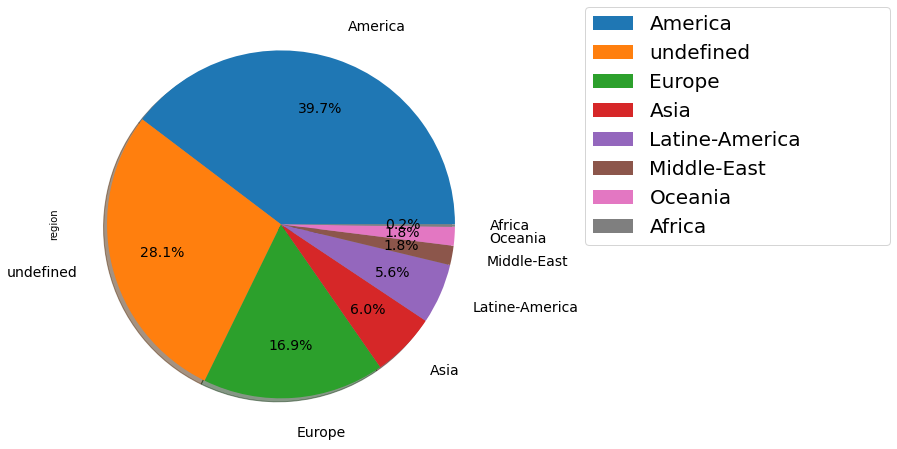

In [83]:
plt.figure(figsize = (8, 8))

region_count.plot(kind='pie',autopct='%1.1f%%',
           pctdistance = 0.7, labeldistance = 1.2,
           shadow = True, textprops={'fontsize': 14})
plt.title("")
plt.legend(bbox_to_anchor=(1.2, 1, 0.7, 0), mode="expand", borderaxespad=0., prop={'size': 20});


In [84]:
# recherche des morceaux en doublons (cf partie "Analyse des informations utilisateur")
df_context[['track_id']].groupby('track_id').size().sort_values(ascending=False)

# => valeurs très élevées pour certains morceaux

track_id
3d02f9fcad37e6bb227682761039498c    31048
5758909ef03fc3a2efaa57408ad43f22    21868
d6b1124fdd64c4b1afa59f967397111d    20912
e24deb4963769d25e2c03ad9bf58a028    16184
acca7456f99b4699871d3fe249e5fe11    13243
                                    ...  
d3525c81718731c4c8401dfe4e3111bf        1
d351d00e33839733e2624380b6188371        1
4daf13bd6ecf63fcae4882c21be58707        1
22bd143feb6f9bfc87530494aeda9b45        1
dc2974c79b9e9c9d0a403d5da3b96b7a        1
Length: 346700, dtype: int64

In [85]:
# différentes régions pour un même morceau
df_context[df_context['track_id']=='3d02f9fcad37e6bb227682761039498c'][['region']].groupby('region').size().sort_values(ascending=False)
# la region ne semble pas avoir de rapport avec le morceau

region
undefined         9756
Europe            8473
America           6010
Asia              3037
Latine-America    1616
Middle-East       1527
Oceania            549
Africa              80
dtype: int64

In [86]:
# la region a t elle un rapport avec l'utilisateur user_id ?
df_context[['track_id', 'region', 'user_id']].sort_values(by=['track_id', 'user_id'])

,track_id,region,user_id
11060360,00003213fb3d4959f42e9157b0eda0a5,America,23247402
11277836,00003213fb3d4959f42e9157b0eda0a5,America,23247402
11391027,00003213fb3d4959f42e9157b0eda0a5,America,23247402
11474490,00003213fb3d4959f42e9157b0eda0a5,America,23247402
11489869,00003213fb3d4959f42e9157b0eda0a5,America,23247402
...,...,...,...
11443261,fffef37bec01701ce5f548fbdb26ad8b,Latine-America,76927491
9754897,fffef37bec01701ce5f548fbdb26ad8b,Asia,2294205733
6924382,ffff7a079e612c20cb79289269ff7cd6,America,83934711
50650,ffff810de31a515d3f221dde21eb2b8b,Europe,61598331


In [87]:
# le même morceau peut être référencé dans différentes régions par le même utilisateur... 
# ça n'a pas de sens (à moins que l'utilisateur se déplace) 

print('morceau : 3d02f9fcad37e6bb227682761039498c :')
display_side_by_side(
    df_context[df_context['track_id']=='3d02f9fcad37e6bb227682761039498c'][['region', 'user_id']].sort_values(by='user_id', ascending=False).head()
    ,
    df_context[df_context['track_id']=='3d02f9fcad37e6bb227682761039498c'][['region', 'user_id']].sort_values(by='user_id', ascending=True).head()
    ,
    titles=['tri / utilisateur (desc)', 'tri / utilisateur (asc)']
)

print('morceau : d6b1124fdd64c4b1afa59f967397111d :')
display_side_by_side(
    df_context[df_context['track_id']=='d6b1124fdd64c4b1afa59f967397111d'][['region', 'user_id']].sort_values(by='user_id', ascending=False).head()
    ,
    df_context[df_context['track_id']=='d6b1124fdd64c4b1afa59f967397111d'][['region', 'user_id']].sort_values(by='user_id', ascending=True).head()
    ,
    titles=['tri / utilisateur (desc)', 'tri / utilisateur (asc)']
)


morceau : 3d02f9fcad37e6bb227682761039498c :


,region,user_id
11026630,undefined,2917951268
11283057,undefined,2914930558
11535482,America,2914930558
11204125,undefined,2912132734
11559457,undefined,2910207185
,region,user_id
11370088,America,0
6854352,undefined,0
4319354,Asia,0
5033400,America,0


morceau : d6b1124fdd64c4b1afa59f967397111d :


,region,user_id
11472008,undefined,2926962354
11590852,undefined,2921321066
11398825,Europe,2909229593
11227804,Europe,2909229593
11310912,Europe,2909229593
,region,user_id
7963541,Asia,0
5476984,Europe,0
8940985,Europe,0
8354102,America,0


<a id="context_geo_ccl"></a>
<b><u>Conclusion :</u></b><br>

Les variables coordinates, geo, place contiennent beaucoup trop de NaN.<br>
La variable time_zone contenait trop de valeurs disparates et a été regroupées par régions (avec toutefois 28.1% de régions indéfinies).<br>
Au final, nous doutons même de la possibilité d'exploiter la variable region.

\> Retour à [**Analyse du fichier context_content_features.csv**](#context_content_title)  |  [**Table des matières**](#hautdepage)

<a id="context_track_analyse"></a>
<u>**Spécificités des morceaux** :</u>

In [88]:
# instrumentalness, liveness, speechiness, danceability, valence, loudness, tempo, acousticness, energy, acousticness, tempo
df_context[['user_id', 'track_id', 'instrumentalness', 'liveness', 'speechiness', 'danceability', 'valence', 'loudness', 'tempo', 'acousticness', 'energy', 'acousticness']]

,user_id,track_id,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,acousticness
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,0.004790,0.1800,0.0294,0.634,0.342,-8.345,125.044,0.000350,0.697,0.000350
1,2205686924,da3110a77b724072b08f231c9d6f7534,0.017700,0.0638,0.0624,0.769,0.752,-8.252,95.862,0.267000,0.826,0.267000
2,132588395,ba84d88c10fb0e42d4754a27ead10546,0.000000,0.0860,0.0436,0.675,0.775,-4.432,97.030,0.217000,0.885,0.217000
3,97675221,33f95122281f76e7134f9cbea3be980f,0.000000,0.1430,0.0292,0.324,0.333,-5.647,74.101,0.239000,0.574,0.239000
4,17945688,b5c42e81e15cd54b9b0ee34711dedf05,0.000183,0.3620,0.0524,0.767,0.808,-5.011,114.237,0.036400,0.739,0.036400
...,...,...,...,...,...,...,...,...,...,...,...,...
11614666,431143812,da58ba1ca758809bb86aa8e3a36d1ecc,0.000000,0.1220,0.1380,0.758,0.914,-14.741,119.507,0.347000,0.477,0.347000
11614667,2819332208,03498f305040835c5f76d7c5660204a2,0.000107,0.1680,0.0291,0.626,0.360,-7.006,132.349,0.664000,0.526,0.664000
11614668,154070865,8bacefe018a221d933529dd466e7c1c0,0.000000,0.0892,0.0378,0.375,0.340,-12.952,62.777,0.932000,0.115,0.932000
11614669,985591650,0e64c11b9a77e93f343f9c1c0cdbcf54,0.000679,0.0836,0.0296,0.312,0.229,-9.146,130.795,0.131000,0.418,0.131000


In [89]:
# ces infos sont spécifiques au morceau lui-même
df_context[df_context['track_id']=='cd52b3e5b51da29e5893dba82a418a4b'][['user_id', 'track_id', 'instrumentalness', 'liveness', 'speechiness', 'danceability', 'valence', 'loudness', 'tempo', 'acousticness', 'energy', 'acousticness']]

,user_id,track_id,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,acousticness
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,0.00479,0.18,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,0.00035
720002,81496937,cd52b3e5b51da29e5893dba82a418a4b,0.00479,0.18,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,0.00035
905985,81496937,cd52b3e5b51da29e5893dba82a418a4b,0.00479,0.18,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,0.00035
1152853,81496937,cd52b3e5b51da29e5893dba82a418a4b,0.00479,0.18,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,0.00035
1156126,880025113,cd52b3e5b51da29e5893dba82a418a4b,0.00479,0.18,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,0.00035
1208320,81496937,cd52b3e5b51da29e5893dba82a418a4b,0.00479,0.18,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,0.00035
1344146,81496937,cd52b3e5b51da29e5893dba82a418a4b,0.00479,0.18,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,0.00035
1623968,81496937,cd52b3e5b51da29e5893dba82a418a4b,0.00479,0.18,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,0.00035
1768032,81496937,cd52b3e5b51da29e5893dba82a418a4b,0.00479,0.18,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,0.00035
2544040,81496937,cd52b3e5b51da29e5893dba82a418a4b,0.00479,0.18,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,0.00035


In [90]:
df_context[['instrumentalness', 'liveness', 'speechiness', 'danceability', 'valence', 'loudness', 'tempo', 'acousticness', 'energy']].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
instrumentalness,11611869.0,0.096441,0.238645,0.00000,0.00000,0.000056,0.0105,0.999
liveness,11611757.0,0.191484,0.159770,0.00673,0.09280,0.128000,0.2490,1.000
speechiness,11610783.0,0.065569,0.064994,0.02160,0.03310,0.042800,0.0674,0.965
danceability,11610783.0,0.557969,0.158056,0.03710,0.45400,0.564000,0.6720,0.992
valence,11609883.0,0.516548,0.247829,0.00001,0.32000,0.513000,0.7200,1.000
loudness,11614671.0,-7.687357,3.846243,-60.00000,-9.64300,-6.815000,-4.9680,3.651
tempo,11614671.0,122.831810,28.300756,0.00000,101.36600,121.308000,139.9200,245.941
acousticness,11611884.0,0.208522,0.269020,0.00000,0.00821,0.075400,0.3210,0.996
energy,11611910.0,0.681561,0.215057,0.00002,0.54100,0.720000,0.8550,1.000


In [91]:
specs_dict = ['instrumentalness', 'liveness', 'speechiness', 'danceability', 'valence',
              'loudness', 'tempo', 'acousticness', 'energy']

# Rappel des valeurs NaN des dictionnaires
for spec_d in specs_dict:
    print(spec_d, ':',df_context[spec_d].isna().sum(),'valeurs nulles (',
          round(100*df_context[spec_d].isna().sum()/len(df_context[spec_d]),2),"% )")

# non mieux, voir si pour chaque variable vide on peut récupérer les infos sur un autre enregistrement du même morceau
# ou alors si c'est que le morceau est NaN partout dans ce champ
# (auquel cas il faudra voir s'il faut le conserver in fine après constitution du dataframe final)

instrumentalness : 2802 valeurs nulles ( 0.02 % )
liveness : 2914 valeurs nulles ( 0.03 % )
speechiness : 3888 valeurs nulles ( 0.03 % )
danceability : 3888 valeurs nulles ( 0.03 % )
valence : 4788 valeurs nulles ( 0.04 % )
loudness : 0 valeurs nulles ( 0.0 % )
tempo : 0 valeurs nulles ( 0.0 % )
acousticness : 2787 valeurs nulles ( 0.02 % )
energy : 2761 valeurs nulles ( 0.02 % )


In [92]:
# recuperer les lignes où toutes ces valeurs sont vides
pd.DataFrame(df_context[  df_context['instrumentalness'].isna()
           & df_context['liveness'].isna()
           & df_context['speechiness'].isna()
           & df_context['danceability'].isna()
           & df_context['valence'].isna()
           & df_context['acousticness'].isna()
           & df_context['energy'].isna()
          ][['track_id']].value_counts(), columns=['count'])

,count
track_id,
f3b434d15747984415c37dbe236007fa,2526
b51e32e1373a925c196336f8acd9a0a6,75
74dee871a3698f998cf0d51cb7950113,41
661875c9ceb5c2c9eb9bed62be579e03,33
4eb4d2955d36190053a6dd3b7b3cf2c8,19
bf38d5a7efe7d80787fe1a6892e4b2de,17
50b76487e72425c2a4cccb7787c9b80b,11
f745142a618d18d00f37231449706d1a,8
f70d966ce3695f72e11695ea484460e4,8


In [93]:
# analyse du morceau f3b434d15747984415c37dbe236007fa
df_context[df_context['track_id']=='f3b434d15747984415c37dbe236007fa']

# beaucoup de NaN.. peut-on remplacer ces valeurs par une valeur neutre ?

,coordinates,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,artist_id,place,geo,tweet_lang,track_id,created_at,lang,time_zone,user_id,id,user_id_found,user_track_found,user_createdat_found,region
178,NaN,NaN,NaN,NaN,NaN,NaN,-60.0,0.0,NaN,NaN,NaN,NaN,2d67938a93e4499f0f84aba300a1ef17,NaN,NaN,en,f3b434d15747984415c37dbe236007fa,2014-01-01 06:01:43,en,Eastern Time (US & Canada),161477576,418245628230369300,1,1,1,America
14749,NaN,NaN,NaN,NaN,NaN,NaN,-60.0,0.0,NaN,NaN,NaN,NaN,2d67938a93e4499f0f84aba300a1ef17,NaN,NaN,en,f3b434d15747984415c37dbe236007fa,2014-01-01 17:27:14,en,,1669435490,418418144722841600,1,1,1,undefined
65838,NaN,NaN,NaN,NaN,NaN,NaN,-60.0,0.0,NaN,NaN,NaN,NaN,2d67938a93e4499f0f84aba300a1ef17,NaN,NaN,en,f3b434d15747984415c37dbe236007fa,2014-01-03 03:28:34,pt,,1958836314,418931864397971460,1,1,1,undefined
66351,NaN,NaN,NaN,NaN,NaN,NaN,-60.0,0.0,NaN,NaN,NaN,NaN,2d67938a93e4499f0f84aba300a1ef17,NaN,NaN,en,f3b434d15747984415c37dbe236007fa,2014-01-03 03:52:02,en,,187904344,418937768434466800,1,1,1,undefined
73473,NaN,NaN,NaN,NaN,NaN,NaN,-60.0,0.0,NaN,NaN,NaN,NaN,2d67938a93e4499f0f84aba300a1ef17,NaN,NaN,en,f3b434d15747984415c37dbe236007fa,2014-01-03 09:16:57,es,Hawaii,356692906,419019539440209900,1,1,1,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11580686,NaN,NaN,NaN,NaN,NaN,NaN,-60.0,0.0,NaN,NaN,NaN,NaN,2d67938a93e4499f0f84aba300a1ef17,NaN,NaN,en,f3b434d15747984415c37dbe236007fa,2014-12-22 11:43:19,en,London,497145453,546979290488008700,1,1,1,Europe
11581502,NaN,NaN,NaN,NaN,NaN,NaN,-60.0,0.0,NaN,NaN,NaN,NaN,2d67938a93e4499f0f84aba300a1ef17,NaN,NaN,et,f3b434d15747984415c37dbe236007fa,2014-12-22 12:13:20,sv,Stockholm,583800504,546986842898567200,1,1,1,Europe
11598135,NaN,NaN,NaN,NaN,NaN,NaN,-60.0,0.0,NaN,NaN,NaN,NaN,2d67938a93e4499f0f84aba300a1ef17,NaN,NaN,ht,f3b434d15747984415c37dbe236007fa,2014-12-22 21:50:00,en,London,919306106,547131967092060160,1,1,1,Europe
11602665,NaN,NaN,NaN,NaN,NaN,NaN,-60.0,0.0,NaN,NaN,NaN,NaN,2d67938a93e4499f0f84aba300a1ef17,NaN,NaN,en,f3b434d15747984415c37dbe236007fa,2014-12-23 00:16:37,en,Santiago,36294697,547168862869794800,1,1,1,Latine-America


In [94]:
# travail sur les spécifications d'un morceau de musique uniquement
df_spec = df_context[['instrumentalness', 'liveness', 'speechiness', 'danceability', 'valence', 'loudness', 'tempo', 'acousticness', 'energy']]


In [95]:
df_spec.loc[:,'instrumentalness_2'] = df_spec['instrumentalness'].fillna(0)
df_spec.loc[:,'liveness_2'] = df_spec['liveness'].fillna(0)
df_spec.loc[:,'speechiness_2'] = df_spec['speechiness'].fillna(0)
df_spec.loc[:,'danceability_2'] = df_spec['danceability'].fillna(0)
df_spec.loc[:,'valence_2'] = df_spec['valence'].fillna(0)
df_spec.loc[:,'loudness_2'] = df_spec['loudness'].fillna(0)
df_spec.loc[:,'tempo_2'] = df_spec['tempo'].fillna(0)
df_spec.loc[:,'acousticness_2'] = df_spec['acousticness'].fillna(0)
df_spec.loc[:,'energy_2'] = df_spec['energy'].fillna(0)


C:\confidentiel\app\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\confidentiel\app\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [96]:
# description / comparaison des mêmes variables avec ou sans fillna(0)
df_spec[['instrumentalness', 'instrumentalness_2',
            'liveness', 'liveness_2',
            'speechiness', 'speechiness_2',
            'danceability', 'danceability_2',
            'valence', 'valence_2',
            'loudness', 'loudness_2',
            'tempo', 'tempo_2',
            'acousticness', 'acousticness_2',
            'energy', 'energy_2'
           ]].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
instrumentalness,11611869.0,0.096441,0.238645,0.00000,0.00000,0.000056,0.0105,0.999
instrumentalness_2,11614671.0,0.096417,0.238621,0.00000,0.00000,0.000056,0.0105,0.999
liveness,11611757.0,0.191484,0.159770,0.00673,0.09280,0.128000,0.2490,1.000
liveness_2,11614671.0,0.191436,0.159778,0.00000,0.09280,0.128000,0.2490,1.000
speechiness,11610783.0,0.065569,0.064994,0.02160,0.03310,0.042800,0.0674,0.965
speechiness_2,11614671.0,0.065547,0.064995,0.00000,0.03310,0.042800,0.0673,0.965
danceability,11610783.0,0.557969,0.158056,0.03710,0.45400,0.564000,0.6720,0.992
danceability_2,11614671.0,0.557783,0.158359,0.00000,0.45400,0.564000,0.6720,0.992
valence,11609883.0,0.516548,0.247829,0.00001,0.32000,0.513000,0.7200,1.000
valence_2,11614671.0,0.516335,0.248000,0.00000,0.31900,0.513000,0.7200,1.000


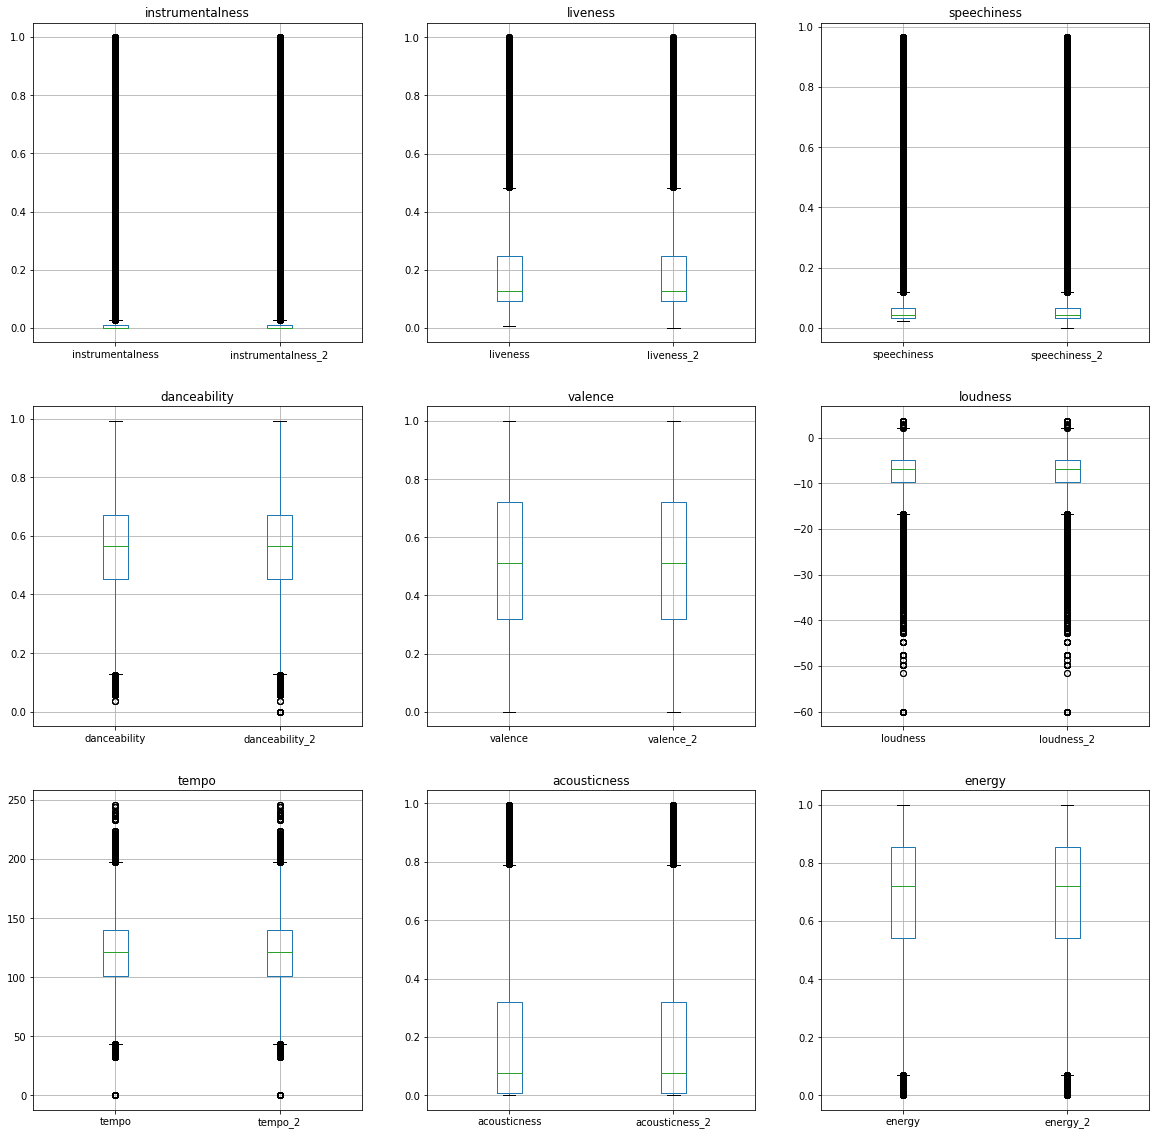

In [97]:
# représentation graphique des variables "spécification d'un morceau"
# avant et après remplacement des NaN par des 0
plt.figure(figsize=(20, 20))

plt.subplot(331)
df_spec.boxplot(column=['instrumentalness', 'instrumentalness_2'])
plt.title('instrumentalness')

plt.subplot(332)
df_spec.boxplot(column=['liveness', 'liveness_2'])
plt.title('liveness')

plt.subplot(333)
df_spec.boxplot(column=['speechiness', 'speechiness_2'])
plt.title('speechiness')

plt.subplot(334)
df_spec.boxplot(column=['danceability', 'danceability_2'])
plt.title('danceability')

plt.subplot(335)
df_spec.boxplot(column=['valence', 'valence_2'])
plt.title('valence')

plt.subplot(336)
df_spec.boxplot(column=['loudness', 'loudness_2'])
plt.title('loudness')

plt.subplot(337)
df_spec.boxplot(column=['tempo', 'tempo_2'])
plt.title('tempo')

plt.subplot(338)
df_spec.boxplot(column=['acousticness', 'acousticness_2'])
plt.title('acousticness')

plt.subplot(339)
df_spec.boxplot(column=['energy', 'energy_2'])
plt.title('energy')
plt.show();



In [98]:
# majeur / mineur
df_context['mode'].value_counts()

1.0    7824514
0.0    3787443
Name: mode, dtype: int64

In [99]:
# tonalité du morceau
df_context['key'].value_counts()

0.0     1346734
7.0     1336827
9.0     1299020
2.0     1233262
1.0     1059536
5.0      957237
4.0      939237
11.0     923601
6.0      769138
10.0     704866
8.0      684025
3.0      358474
Name: key, dtype: int64

<a id="context_track_ccl"></a>
<b><u>Conclusion :</u></b><br>
Remplacer les NaN des variables<br>
instrumentalness, liveness, speechiness, danceability, valence, loudness, tempo, acousticness, energy
<br>
par des zéros n'a que très peu d'incidence (invisible sur le graphique, très peu visible dans le la description describe())


Les variables mode (majeur, mineur) & key (tonalité) ne sont pas des informations pertinentes, on peut supprimer ces variables.

\> Retour à [**Analyse du fichier context_content_features.csv**](#context_content_title)  |  [**Table des matières**](#hautdepage)

<a class="anchor" id="context_ccl"></a>
### <u><b>Conclusion fichier context_content_features.csv :</b></u><br>
<blockquote>
    
Aucune des variables de langue "lang, tweet_lang" n'est utile.

Les variables "coordinates, geo, place" sont à supprimer (beaucoup trop de NaN).
La variable time_zone contenait trop de valeurs disparates et a été regroupées par régions (avec toutefois 28.1% de régions indéfinies et des doutes sur le sens de cette variable "région", est-elle liée à l'utilisateur ?).<br/>
Le regroupement par region n'est pas clair. Est-ce lié à l'utilisateur ? A l'endroit où le tweet a été émis ? Pourtant les mêmes utilisateurs peuvent avoir différentes région pour le même morceau. Mystère...
    
Concernant les spécificités du morceau :<br>
il est sans intérêt de conserver les variables "mode, key".    
"instrumentalness, liveness, speechiness, danceability, valence, loudness, tempo, acousticness, energy", on peut remplacer les NaN par des zéros.
</blockquote>

\> Retour à [**Analyse du fichier context_content_features.csv**](#context_content_title)  |  [**Table des matières**](#hautdepage)

<a id="context_df"></a>
### <u><b><font color="#A40606">Constitution du fichier df_context.csv :</font></b></u><br>

<font color="red"><u>**Mise à jour du 08.12.2021**</u></font><br>
Les fichiers sont désormais créés par le notebook `"projDS-00-fichiers"`.<br>
Ce notebook n'est là que pour l'analyse des fichiers d'origine (les cellules de création des fichiers ont été transformées en texte brut).

In [100]:
df_context.drop(columns=['lang', 'tweet_lang', 'coordinates', 'geo', 'place', 'time_zone', 'id', 'mode', 'key'], inplace=True)
df_context['instrumentalness'].fillna(0, inplace=True)
df_context['liveness'].fillna(0, inplace=True)
df_context['speechiness'].fillna(0, inplace=True)
df_context['danceability'].fillna(0, inplace=True)
df_context['valence'].fillna(0, inplace=True)
df_context['loudness'].fillna(0, inplace=True)
df_context['tempo'].fillna(0, inplace=True)
df_context['acousticness'].fillna(0, inplace=True)
df_context['energy'].fillna(0, inplace=True)

In [101]:
df_context.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11614671 entries, 0 to 11614670
Data columns (total 17 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   instrumentalness      11614671 non-null  float64
 1   liveness              11614671 non-null  float64
 2   speechiness           11614671 non-null  float64
 3   danceability          11614671 non-null  float64
 4   valence               11614671 non-null  float64
 5   loudness              11614671 non-null  float64
 6   tempo                 11614671 non-null  float64
 7   acousticness          11614671 non-null  float64
 8   energy                11614671 non-null  float64
 9   artist_id             11614671 non-null  object 
 10  track_id              11614671 non-null  object 
 11  created_at            11614671 non-null  object 
 12  user_id               11614671 non-null  int64  
 13  user_id_found         11614671 non-null  int32  
 14  user_track_found

\> Retour à [**Analyse du fichier context_content_features.csv**](#context_content_title)  |  [**Table des matières**](#hautdepage)

<a id="global_df"></a>
### <u><b><font color="#A40606">Constitution du fichier df_global.csv :</font></b></u><br>
<blockquote>
    <b>Fichier de travail</b><br/>
Enrichissement du fichier des utilisateurs user_track_hashtag_timestamp<br>
par les sentiment -> merge sur le hashtag<br>
et par les context_content_features -> merge sur le track_id

</blockquote>

<font color="red"><u>**Mise à jour du 08.12.2021**</u></font><br>
Les fichiers sont désormais créés par le notebook `"projDS-00-fichiers"`.<br>
Ce notebook n'est là que pour l'analyse des fichiers d'origine (les cellules de création des fichiers ont été transformées en texte brut).

In [102]:
# merge user_track <- sentiment
df_global = df_usertrack.merge(right = df_sentiment, on = 'hashtag', how = 'left')

In [103]:
# merge user_track <- context
df_context_cleaned = df_context.drop_duplicates(subset=['track_id']).drop(columns=['created_at', 'user_id', 'user_id_found', 'user_track_found', 'user_createdat_found'])
df_global = df_global.merge(right = df_context_cleaned, on = 'track_id', how = 'left')

In [104]:
df_global.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6356936 entries, 0 to 6356935
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   user_id           6356936 non-null  int64  
 1   track_id          6356936 non-null  object 
 2   hashtag           6356936 non-null  object 
 3   created_at        6356936 non-null  object 
 4   hashtag_found     6356936 non-null  int32  
 5   sent_score2       431906 non-null   float64
 6   instrumentalness  6356934 non-null  float64
 7   liveness          6356934 non-null  float64
 8   speechiness       6356934 non-null  float64
 9   danceability      6356934 non-null  float64
 10  valence           6356934 non-null  float64
 11  loudness          6356934 non-null  float64
 12  tempo             6356934 non-null  float64
 13  acousticness      6356934 non-null  float64
 14  energy            6356934 non-null  float64
 15  artist_id         6356934 non-null  object 
 16  

\> Retour à la [**Table des matières**](#hautdepage)

## FIN ---

In [105]:
print("temps d'éxécution total")
print("--- %s seconds ---" % (time.time() - begin_time))
print(timedelta(seconds=round((time.time() - begin_time),0)))

# temps d'éxécution ~24mn



temps d'éxécution total
--- 1133.2554001808167 seconds ---
0:18:53
